# Pattern Recognition

1. FEATURE EXTRACTION & DIMENSIONALITY REDUCTION: Principal Component Analysis, Independent Component Analysis (2 hours)
2. DATA CLUSTERING: K-means, Hierarchical clustering, Gaussian Mixture Models (4 hours)
3. SUPERVISED CLASSIFICATION: LDA, SVM, ANN, Regression Trees (4 hours)
4. INTRODUCTION TO DEEP LEARNING: Convolutional Neural Networks (2 hours)


IA_overview.png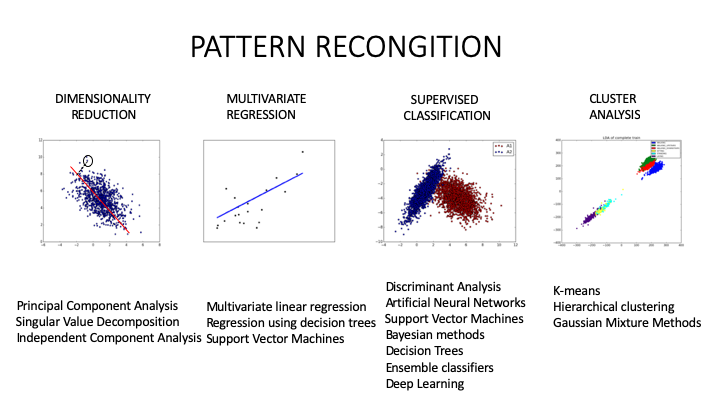

data_IA.png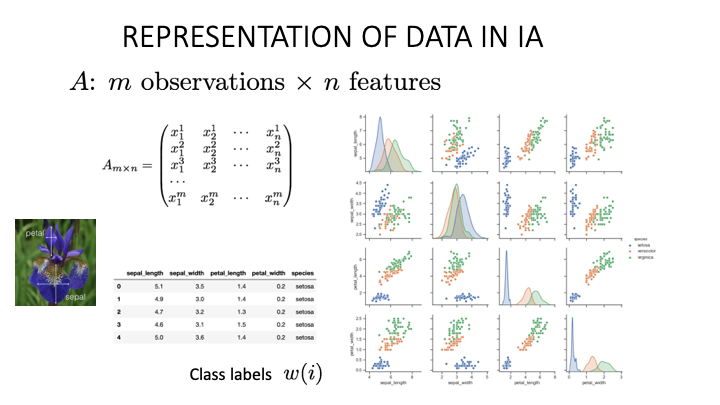

## 1. FEATURE EXTRACTION AND DIMENSIONALITY REDUCTION

### 1.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
Pytnon implementation (sklearn):
https://scikit-learn.org/stable/modules/decomposition.html#pca



Slide3.png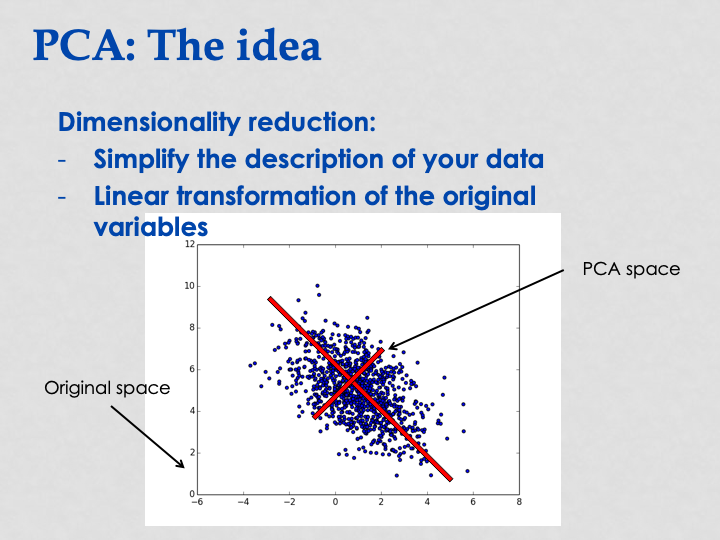



Slide4.png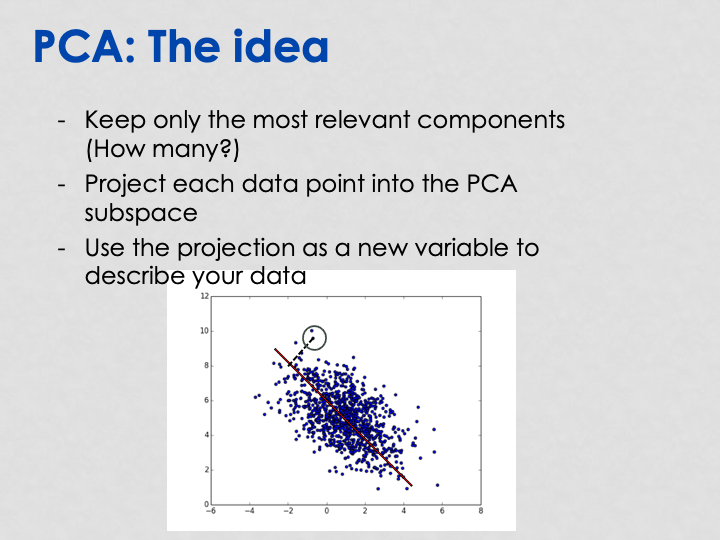

Slide5.png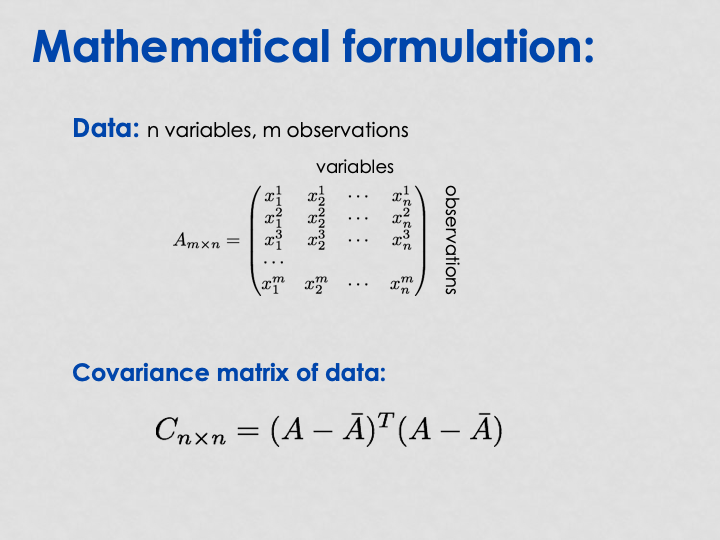


Linear coordinate transformation in which the new axis correspond to the directions in which the data presents more dispersion. The procedure is the following:

- $A$: data matrix of size $mxn$ (m observations x n variables).
- Demean the data: $(A-\bar{A})$.
- Obtain the $n \times n$ covariance matrix of the data: $C = (A-\bar{A})^T(A-\bar{A})$.
- Diagonalize C: $C \cdot \vec{v}_i = \lambda_i \vec{v}_i, i = 1,\dots,n$. Eigenvectors $\vec{v}_i$ correspond to the coordinates of the PCA space. Eigenvalues $\lambda_i$ correspond to variance of the original data explained by each component. 
- Variance explained by the principal component $\vec{v}_i$ is: $\frac{\lambda_i}{\sum_i^n\lambda_i}$
- Project data into the new PCA space. Projection into the ith component: $P_i = A \cdot \vec{v}_i$


Slide6.png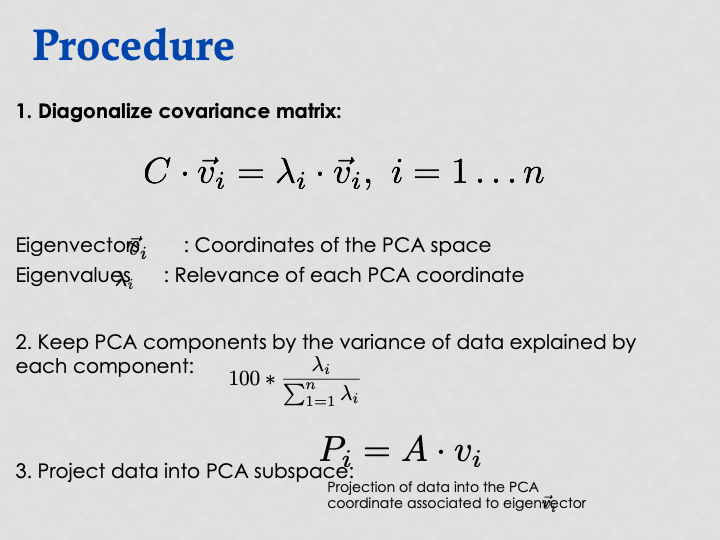

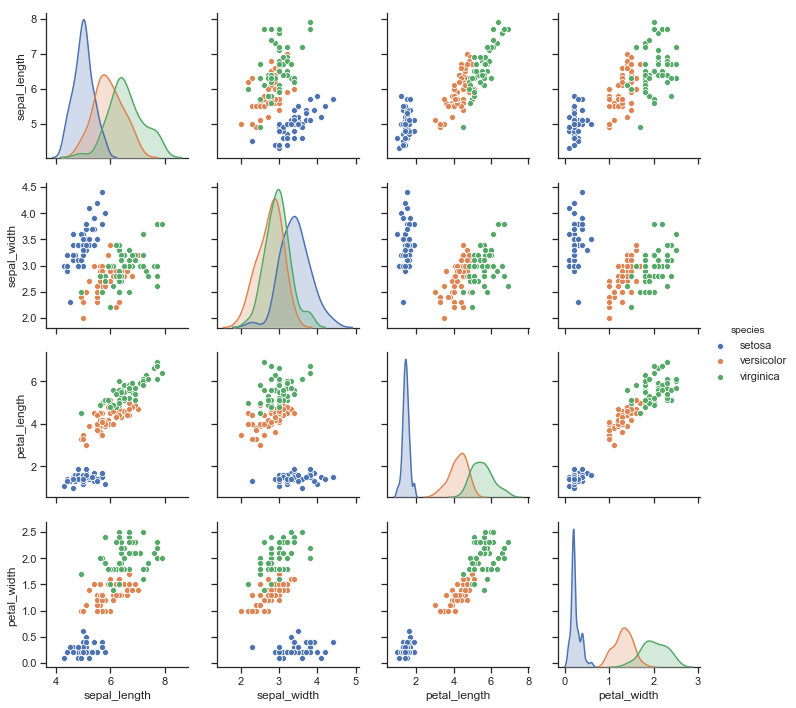

In [3]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

In [19]:
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

We should standardize the data before proceeding:

In [20]:
XS = (X-X.mean(axis=0))/X.std(axis=0)

# it's equivalent to: 

from sklearn.preprocessing import StandardScaler
XS1 = StandardScaler().fit_transform(X)

# check it:
print('Both ways are equivalent: {}'.format((XS-XS1).sum()))

Both ways are equivalent: 0.0


In [21]:
import numpy as np
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

XS = (X-X.mean(axis=0))/X.std(axis=0)

pca = decomposition.PCA(n_components=4,whiten=False).fit(XS)
Xproj = pca.transform(XS)

**PCA Eigenvalues and eigenvectors:**

In [22]:
print('Eigenvalues = {} {} {} {}'.format(*pca.explained_variance_))
print('Eigenvectors = {} {} {} {}'.format(*pca.components_))

Eigenvalues = 2.9380850501999953 0.9201649041624879 0.14774182104494815 0.02085386217646228
Eigenvectors = [ 0.52106591 -0.26934744  0.5804131   0.56485654] [0.37741762 0.92329566 0.02449161 0.06694199] [-0.71956635  0.24438178  0.14212637  0.63427274] [-0.26128628  0.12350962  0.80144925 -0.52359713]


In [5]:
100*pca.explained_variance_ratio_.cumsum()
# same as:
100*pca.explained_variance_.cumsum()/pca.explained_variance_.sum()

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

Reproduce results by diagonalization of the data covariance matrix ($d \times d$ dimensions, d: number of features):


In [6]:
A = np.cov(XS.T)
print(A.shape)
print(A)

(4, 4)
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [7]:
A1 = np.dot(XS.T,XS)/(XS.shape[0]-1)
print(A.shape)
print(A1)

(4, 4)
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
from numpy import linalg
val,vec = linalg.eig(A)
print('eval = {}'.format(val))
print('evec = {}'.format(vec))

#U,S,Vt = linalg.svd(A)

eval = [2.93808505 0.9201649  0.14774182 0.02085386]
evec = [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Projection of the original 4D data to the 2D PCA space, since the two principal components with largest eigenvalues capture 97% of the variance in the data

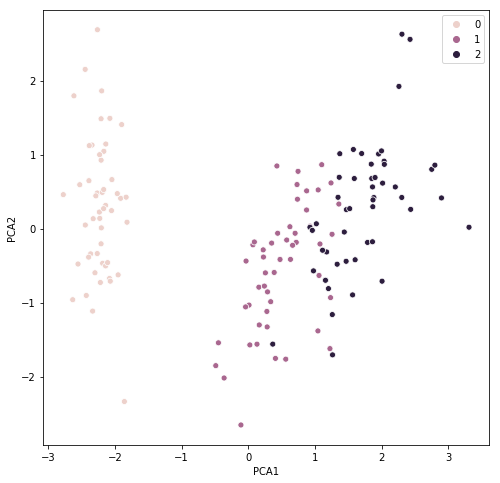

In [9]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

Represent the directions of the 2 largest eigenvectors: 

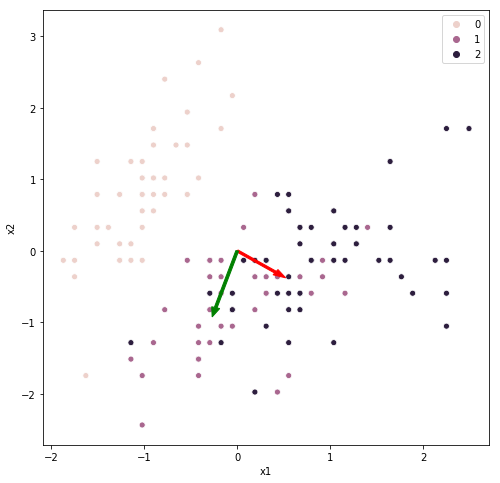

In [11]:
# original data (scaled)
dfpcas = pd.DataFrame(XS[:,0:2],columns=['x1', 'x2'])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="x1", y="x2", hue=y,data=dfpcas)
plt.arrow(0,0,vec[0][0],vec[0][1],shape='full',fc='r', ec='r', length_includes_head = True, width=0.03)
plt.arrow(0,0,vec[1][0],vec[1][1],shape='full',fc='g', ec='g', length_includes_head = True, width=0.03)
plt.show()

Check that eigenvectors are indeed orthogonal:

In [47]:
np.dot(vec[0],vec[1])

-1.1102230246251565e-16

Importance of scaling in PCA

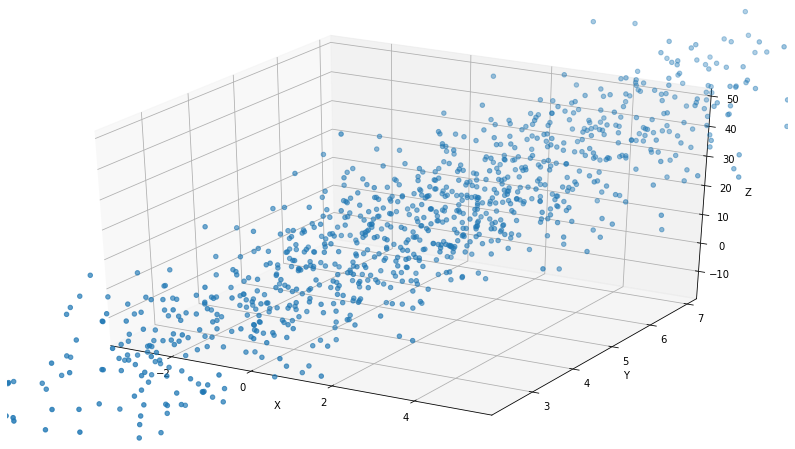

PCA without scaling: [0.743 0.237 0.021]
PCA with scaling: [0.399 0.332 0.269]


In [14]:
from numpy import *
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d con diferentes std en cada dirección
mean = [1,5,10]
cov = [[2,-1,0],[-1,20,-1],[0,-1,60]]
d = random.multivariate_normal(mean,cov,1000)

# ANALISIS PCA:
# Estandarizacion de los datos ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0],d[:,1],d[:,2])
ax.axis('equal')
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()

import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1.fit(d)
X = pca1.transform(d)
print('PCA without scaling:',format(pca1.explained_variance_ratio_))

pca2 = PCA(n_components=3)
pca2.fit(d1)
X = pca2.transform(d1)
print('PCA with scaling:',format(pca2.explained_variance_ratio_))

If data is not scaled one of the components will account for much of the variance in the data due to the differences in variable ranges. When data presents different units or scales this is something important to be taken into account.

**PCA with artificial data:**

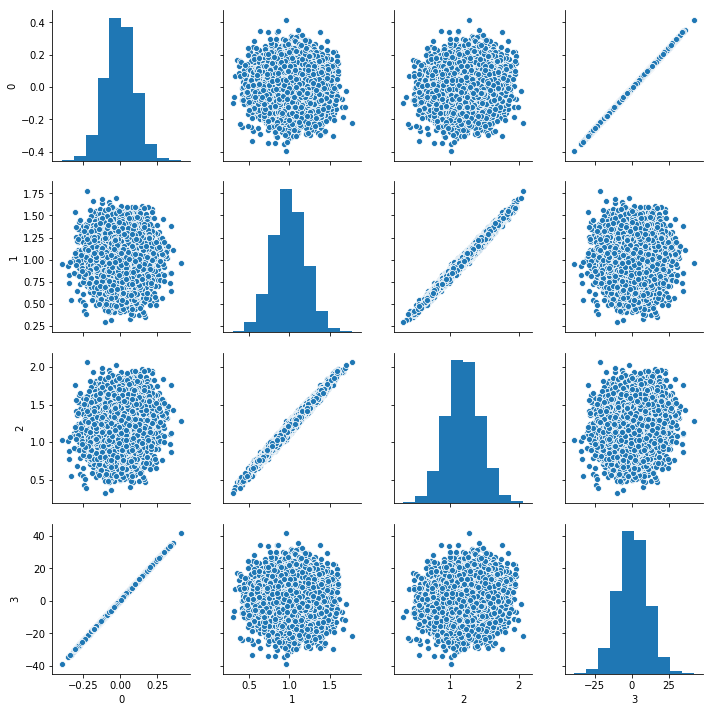

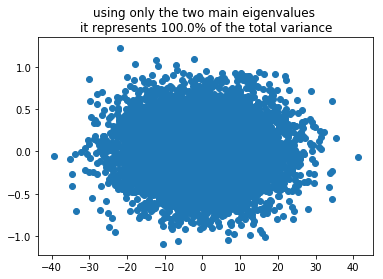

In [19]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

plt.close()
# random vectors x1 and x2

mu1, sigma1 = 0, 0.1
mu2, sigma2 = 1, 0.2

x1 = np.random.normal(mu1, sigma1, 10000)
#plt.plot(x1)
#plt.show()
x2 = np.random.normal(mu2, sigma2, 10000)


# creation of x3 and x4
x3 = 0.3*x1+1.2*x2
x4 = 100*x1+0.4*x2

#x4 = np.abs(x1)**0.5+x2  #yes it's exactly the exemple of the statment


# data matrix
M=np.transpose([x1, x2, x3, x4]) #simply creats the matrix
data=pd.DataFrame(data=M) # and now it transforms it into a usefull data matrix

#scatter matrix
sns.pairplot(data)
# PCA analysis
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data_proj = pca.transform(data)
t=pca.explained_variance_ratio_
plt.figure()
plt.title(str("using only the two main eigenvalues \nit represents "+str(1/100*int(10000*(t[0]+t[1])))+"% of the total variance"))
plt.scatter(data_proj[:,0], data_proj[:,1])
plt.show()


### 1.2 INDEPENDENT COMPONENT ANALYSIS (ICA)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html


- Consider two independent systems A and B that are represented by two time signals $s_A(t)$ and $s_B(t)$.
- The two signals get mixed in a unknown proportion (matrix A, size 2x2). 
- We measure the mixed signals $x_1(t)$ and $x_2(t)$. 

Question: Can we infer the form of the two source signals $s_A(t)$ and $s_B(t)$ only from $x_1(t)$ and $x_2(t)$?.

Answer: Yes, we can {\em if the two systems are statistically independent}. 

How?: Independent Component Analysis (ICA).


<Figure size 432x288 with 0 Axes>

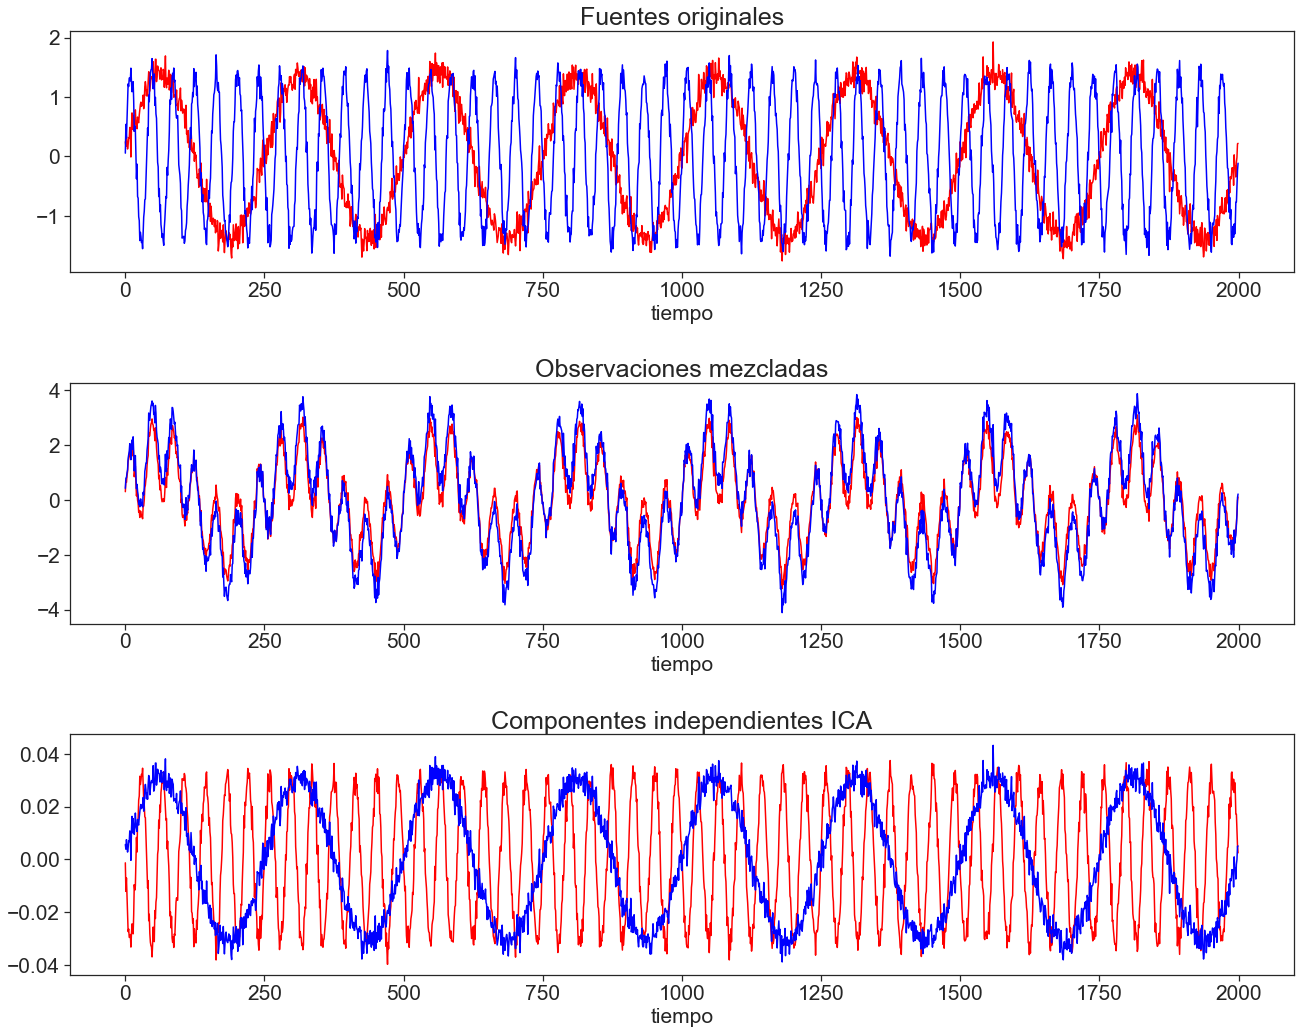

In [128]:
import numpy as np
import pylab as py
import scipy as sc
from sklearn.decomposition import FastICA

# Generar señales sinteticas:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Fuentes originales:
s1 = np.sin(2 *np.pi* time)  # Signal 1 : sinusoidal signal
s2 = np.sin(13 *np.pi* time)  # Signal 1 : sinusoidal signal

S = np.c_[s1, s2]

# Añadir ruido:
S += 0.1 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Estandarizar datos
# Mezclar señales:
A = np.array([[1, 1], [1.5, 1.0]])  # Matriz de mezcla
X = np.dot(S, A.T)  # Observaciones mezcladas

# Descomposicion ICA :
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruccion ICA

# representacion de resultados :
plt.figure()
plt.figure(figsize=(20,20))

models = [S, X, S_]
names = ['Fuentes originales','Observaciones mezcladas',
         'Componentes independientes ICA']
colors = ['red', 'blue', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name, size=25)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.xlabel('tiempo', fontsize=21) 
        plt.tick_params(labelsize=21)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

### 1.3 FEATURE SELECTION

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

**Correlation heatmap:**

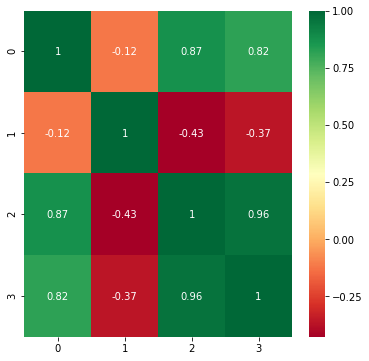

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**K best feature selector:** 

Select features according to the k highest scores of a certain test: In this example, the method computes chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.


Other methods available as a performance scores:
- f_classif
ANOVA F-value between label/feature for classification tasks.

- mutual_info_classif
Mutual information for a discrete target.

- chi2
Chi-squared stats of non-negative features for classification tasks.

- f_regression
F-value between label/feature for regression tasks.

- mutual_info_regression
Mutual information for a continuous target.

- SelectPercentile
Select features based on percentile of the highest scores.

- SelectFpr
Select features based on a false positive rate test.

- SelectFdr
Select features based on an estimated false discovery rate.

- SelectFwe
Select features based on family-wise error rate.

- GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [142]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

**Recursive Feature Elimination:** Given a set of training features and a classifier, the method recursively evaluates the performance of the method when removing some features and finally provides a reduced set of features that provide minimum loss of performance:

Data shape: (1797, 64)
Removed features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


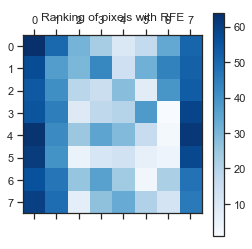

In [135]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
# The database contains 1797 Images of size 8x8 pixels
# Each of the 64 pixels is a feature
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
print('Data shape: {}'.format(X.shape))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))

# Relevance of each of the pixels represented as a 8x8 image:
# darker pixels at the borders can be discarded since do not improve the classifier's performance during training
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking (the lower, the more relevant the feature)
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

### 1.4. EIGENFACES 
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


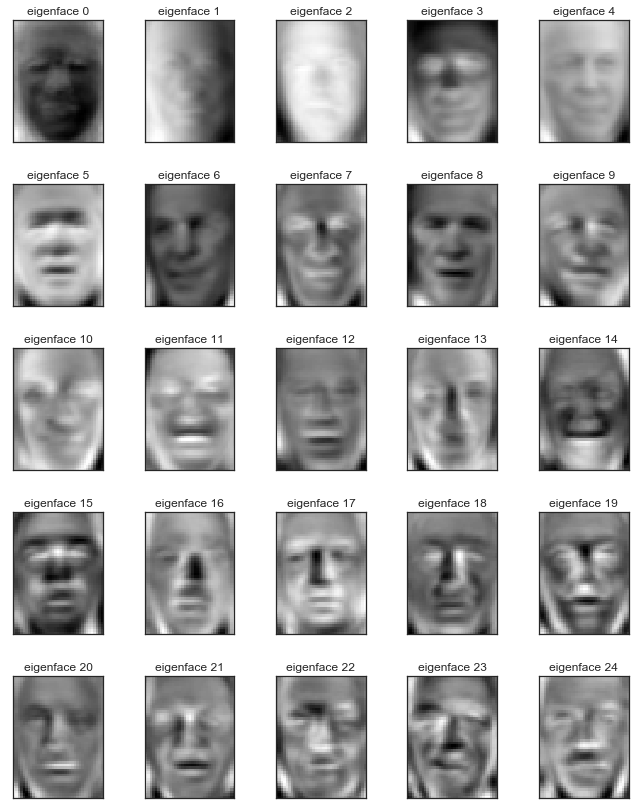

In [55]:
# Cargar librerias necesarias:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Obtener las imágenes de la base de datos:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# ontener numero de imagenes y tamaño:
n_samples, h, w = lfw_people.images.shape

# Cargar los datos:
X = lfw_people.data

# numero de variables del espacio PCA reducido:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Representar las eigenfaces más representativas:
n_row=5
n_col=5
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(eigenface_titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.show()

# 2. Data clustering:

Unsupervised algorithms that group data observations in clusters that share some structural similarities

## 2.1 kmeans algorithm:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations. 


Automatically created module for IPython interactive environment


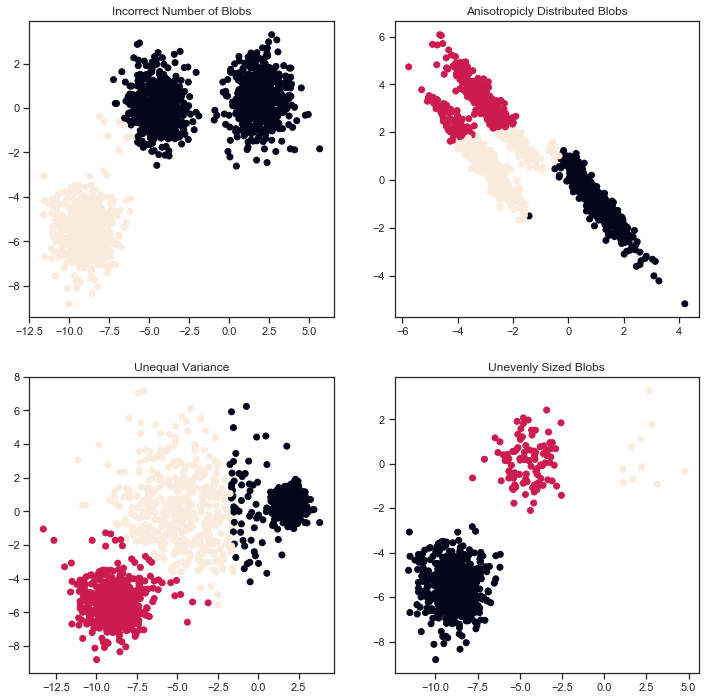

In [56]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# 2.2 Hierarchical clustering, agglomerative clustering:


Sequence of partitions of the data into a set of clusters. They can be either agglomerative or Divisive: 

- Divisive: Start with all observations in one cluster and slplit the clusters sequencially.

- Agglomerative: Start with as many cluster as observations and group them according to a cluster to cluster distance (linkage). 

Consider two clusters $r$ and $s$ with $n_r$ and $n_s$ observations. A common cluster-cluster distances is: 

\begin{equation*}
d_{min}(r,s) = \min \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s
\end{equation*}
where $d(x_i^r,x_j^s)$ is the euclidean distance between observation $i$ in cluster $r$ and $j$ in cluster $s$.

Other commonly used cluster-cluster distances are: 
\begin{eqnarray*}
d_{max}(r,s) &=& \max \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s \\
d_{max}(r,s) &=& \frac{1}{n_s n_r}\sum_{i=1}^{n_r} \sum_{j=1}^{n_s} d(x_i^r,x_j^s) 
\end{eqnarray*}



The agglomerative clustering algorithm:

[1] Specify the number of clusters $k$ to be found in data.

[2] Initizlize the number of clusters to the number of observations $N$.  

[3] Group the nearest two clusters based on a cluster-to-cluster distance. 

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_{N-1}$.

[5] Repeat steps 3-4 until the number of clusters is $k$.  



In [28]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')
clustering.labels_

array([1, 1, 1, 0, 0, 0])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [2.0, 3.0, 3.0, 2.0]],
 'ivl': ['2', '0', '1', '5', '3', '4'],
 'leaves': [2, 0, 1, 5, 3, 4],
 'color_list': ['g', 'g', 'r', 'r', 'b']}

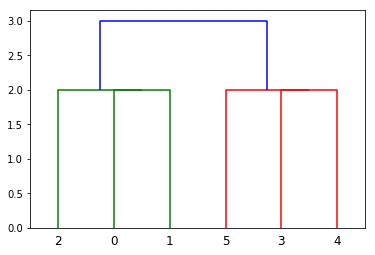

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z) 

Apply to blobs:

<Figure size 864x864 with 0 Axes>

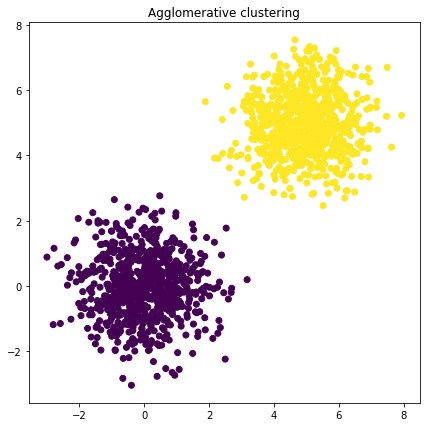

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

plt.figure(figsize=(7,7))
labels = clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()

# 2.3 Gaussian Mixture Model Clustering

We model the distribution of the multidimensional observations using a mixture of gaussian distributions: 

# $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma)$
# $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

<Figure size 864x864 with 0 Axes>

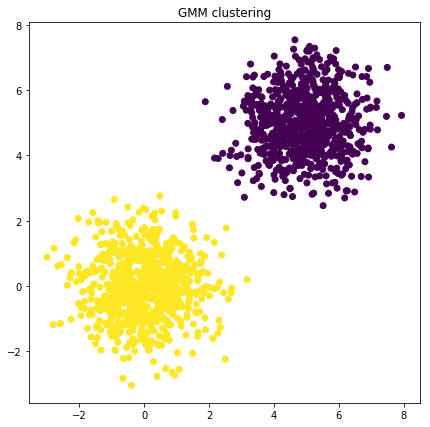

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

**GMM model selection: How many clusters?:**

Automatically created module for IPython interactive environment


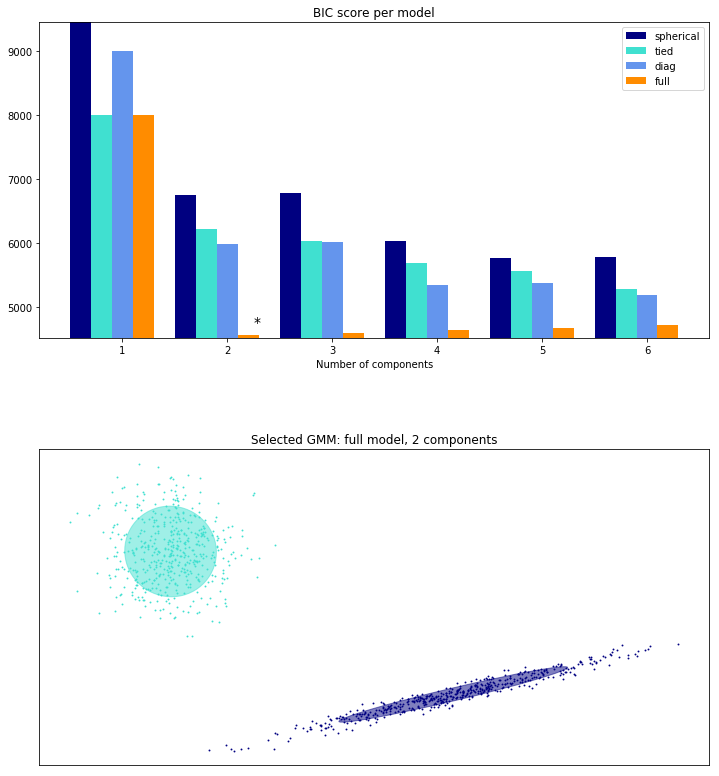

In [32]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(12, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

Compare the three clustering methods:


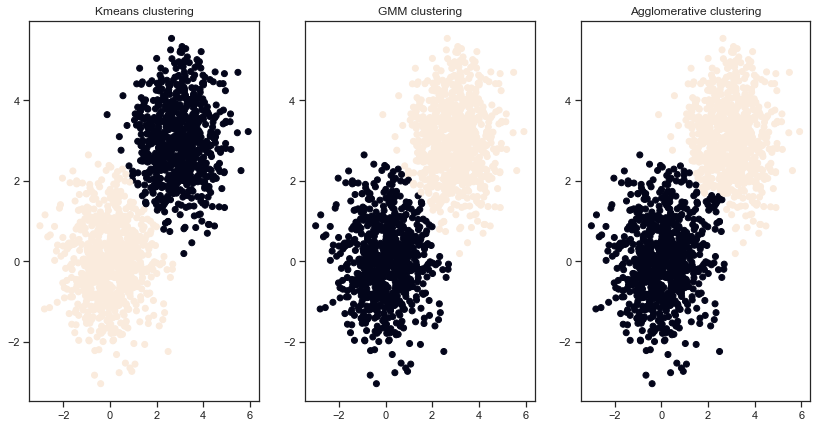

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture

# Generate data:
n_samples = 1500
centers = [(0, 0), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering().fit_predict(X) 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

Exercise: Compute the correct and incorrect clustering occurences in each method:


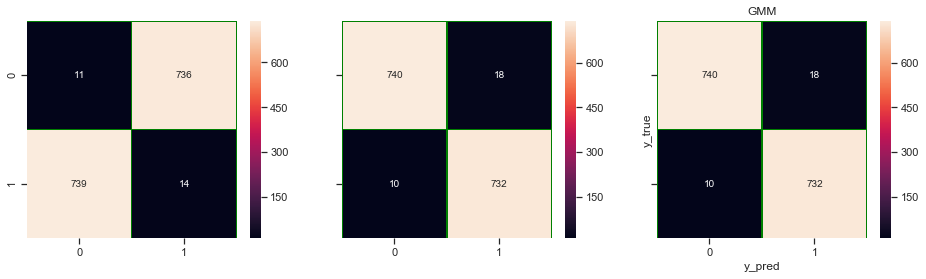

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(clust_kmeans, y)
cm2 = confusion_matrix(clust_agg, y)
cm3 = confusion_matrix(clust_gmm, y)

fig, ax = plt.subplots(1, 3, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[2])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('GMM')
plt.show()

# 3. SUPERVISED CLASSIFICATION

- LINEAR DISCRIMINANT ANALYSIS (LDA)
- NAÏVE BAYES
- KNN
- DECISION TREES 
- SUPPORT VECTOR MACHINES (SVM)
- ARTIFICIAL NEURAL NETWOKS (ANNs)

## 3.1 LINEAR DISCRIMINANT ANALYSIS (LDA)

The Bayes theorem in the context of data classification:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
where $\vec{x} = \{x_1,\dots,x_d\}$ is an observation in a d-dimensional feature space and $\omega_i$ is a label for class $i$. 
Bayesian decision theory: Assign observation $\vec{x}$ to the class that maximizes the posterior probability $p(\omega_i|\vec{x})$:
\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} p(\omega_i|\vec{x}) 
\end{equation*}

We define the discriminant function $g_i(\vec{x})$ as:
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i)
\end{equation*}

When all $G$ classes have equal prior probabilities $p(\omega_i)=1/G$, the Maximum a Posteriori decision is equivalent to a Maximum Likelihood since 
the posterior is proportional to the likelihood function $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$. 

Let's assume that observations $\vec{x}$ belonging to class $\omega_i$ are distributed according to a d-dimensional multivariate normal $N(\mu_i,\Sigma_i)$. The likelihood is then given by:
\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} 
e{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)}
\end{equation*}
%
and the discriminant function $g_i(\vec{x})$ is then given by:
%
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Multi-class supervised classification algorithm based on discriminant functions: 

[1] Construct a {\bf training set} of labeled observations $\mathcal{D}_i$ for each class $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
\mathcal{D}_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Use training sets $\mathcal{D}_i, \, i=1,\dots,G$ to estimate the i-the class parameters $(\mu_i,\Sigma_i)$. 

[3] Classify a new unlabeled observation $\vec{x}_{new}$ to the class with maximum discriminant function:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} g_i(\vec{x}_{new}) 
\end{equation*}


**Example: LDA on artificial data:**

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]
[2.]


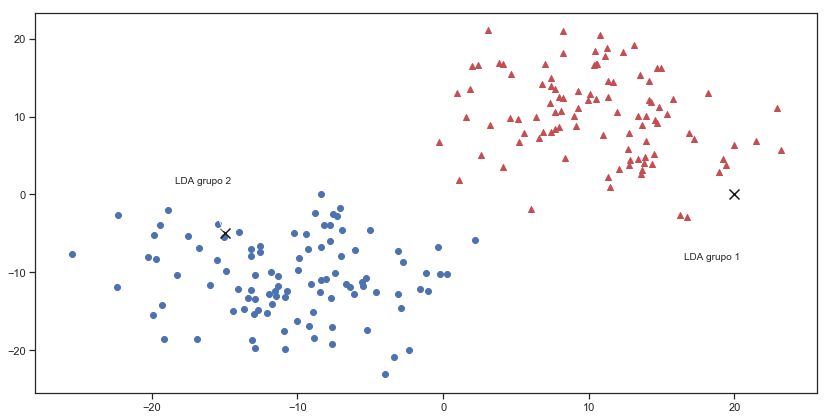

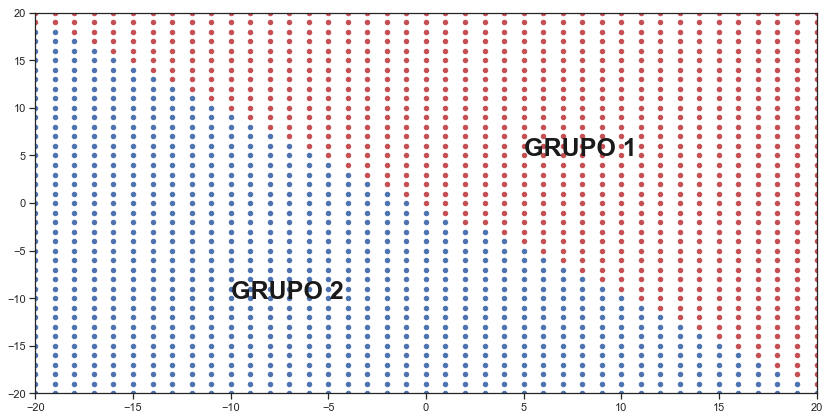

In [67]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Datos gaussianos:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Representar gráficamente los datos de entrenamiento: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenar los dos conjuntos de puntos:
XT = np.concatenate((X1,X2))

# Etiquetar los datos como tipo 1 o tipo 2:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Fase de entrenamiento: 
clf = LinearDiscriminantAnalysis(n_components=2,priors=None)
clf.fit(XT, labelT)

#Fase de predicciÛn:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# RepresentaciÛn de la predicciÛn de los datos [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# PredicciÛn de datos en una retÌcula:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'GRUPO 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'GRUPO 2',fontsize=25,fontweight='bold',color='k')
plt.show()

**Example: LDA on UCI wine dataset:**


In [78]:
import numpy as np
import pylab
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import csv
Names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
DATA=[]
csv.register_dialect('myDialect', delimiter= ';', skipinitialspace=True)

with open('winequality-white.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, dialect="myDialect")
    for row in spamreader:
        L=[]
        for i in row :
            L.append(float(i))
        DATA.append(L)

#remove first line, ex-name of data
DATA=DATA[1:len(DATA)]

Training=[]
Qual=[]
for row in DATA:
    Training.append(row[0:11])
    Qual.append(row[11])
csvfile.close()


# We cut the data in two sets, one for validation one for training
Validation=Training[len(Training)-100:len(Training)]
Training=Training[:len(Training)-100]

clf = LinearDiscriminantAnalysis(n_components=11,priors=None)
clf.fit(Training, Qual[:len(Training)])

print(clf.predict([[8, 0.3, 0.4, 8, 0.05, 30, 180, 1, 3.3, 0.5, 10]])) 

#let's compute the confusion matrix with the Validation data-set and the Quality corresponding

Prediction=[]
for i  in Validation :
    Prediction.append(float(clf.predict([i])))
print("Confusion matrix :")
print(confusion_matrix(Qual[len(Training):],Prediction))
print("Here are the Cij, number of prediction made in group i but which are supposed to be in group j \nQuality goes from", min (min(Qual[len(Training):]),min(Prediction))," to ",max(max(Qual[len(Training):]),max(Prediction)) )


[5.]
Confusion matrix :
[[ 1  0  2  0  0]
 [ 1 13 10  0  0]
 [ 0 10 39  7  0]
 [ 1  0  9  6  0]
 [ 0  0  1  0  0]]
Here are the Cij, number of prediction made in group i but which are supposed to be in group j 
Quality goes from 4.0  to  8.0


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


**Exercise: Two-class discriminant analysis with 2D features:**

Consider the training set: 

Class $\omega_1$: $\mathcal{D}_1 =\{(3,4),(2,6),(4,6),(3,8)\}$. 

Class $\omega_2$: $\mathcal{D}_2 =\{(3,0),(1,-2),(5,-2),(3,-4)\}$. 

- Obtain sample estimates of the mean and covariance matrix for each class.

- Obtain the discriminant functions $g_1(\vec{x}),g_2(\vec{x})$ assuming equal priors.

- Evaluate $g_1(\vec{x}),g_2(\vec{x})$ to classify a new observation $\vec{x}_{new} = (2,-1)$.

Result: $g_1(\vec{x}) = -(x_1-3)^2-\frac{1}{4}(x_2-6)^2$, $g_2(\vec{x}) = -\frac{1}{4}(x_1-3)^2-\frac{1}{4}(x_2+2)^2$.
\end{exampleblock}


## 3.2 NAÏVE BAYES

Assume that features $x_i$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{i=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_i \sim N(\mu_i,\sigma_i^2)$, the discriminant function $g_i(\vec{x})$ is: 
%
\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_i-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


In [164]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## 3.3 K-nearest neighbours (KNN)

Very simple algorithm: An unlabeled observation is classified by assigning the label which is most frequent among the k training samples nearest to that point (i.e. the k-th nearest neighbours).

knn.png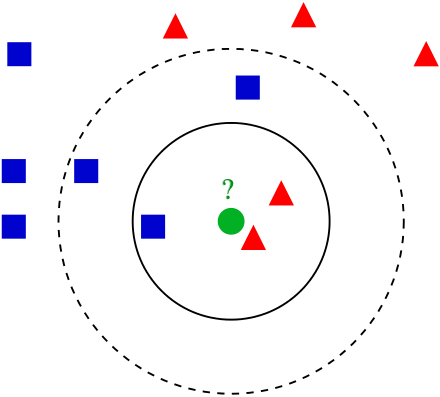

In [90]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
Xnew = np.array([2.5]).reshape(1, -1)
print(knn.predict(Xnew))
Xnew1 = np.array([0.5]).reshape(1, -1)
print(knn.predict(Xnew1))


[1]
[0]


## 3.4 DECISION TREES

- Classification And Regression Tress (CART): Solve both regression and classification problems. 

- Tree creation: We start from a training set of labelled observations. Data is splitted in child nodes by using binary queries. The query at each split is selected accoding to a measure of node impurity: A node is said to be pure if all the observations have the same label. 

- The grow of the binary tree creates a set of linear decision boundaries splitting the data in different groups.



**EXAMPLE: The UCI mushroom dataset**

https://archive.ics.uci.edu/ml/datasets/mushroom

table_mushroom.png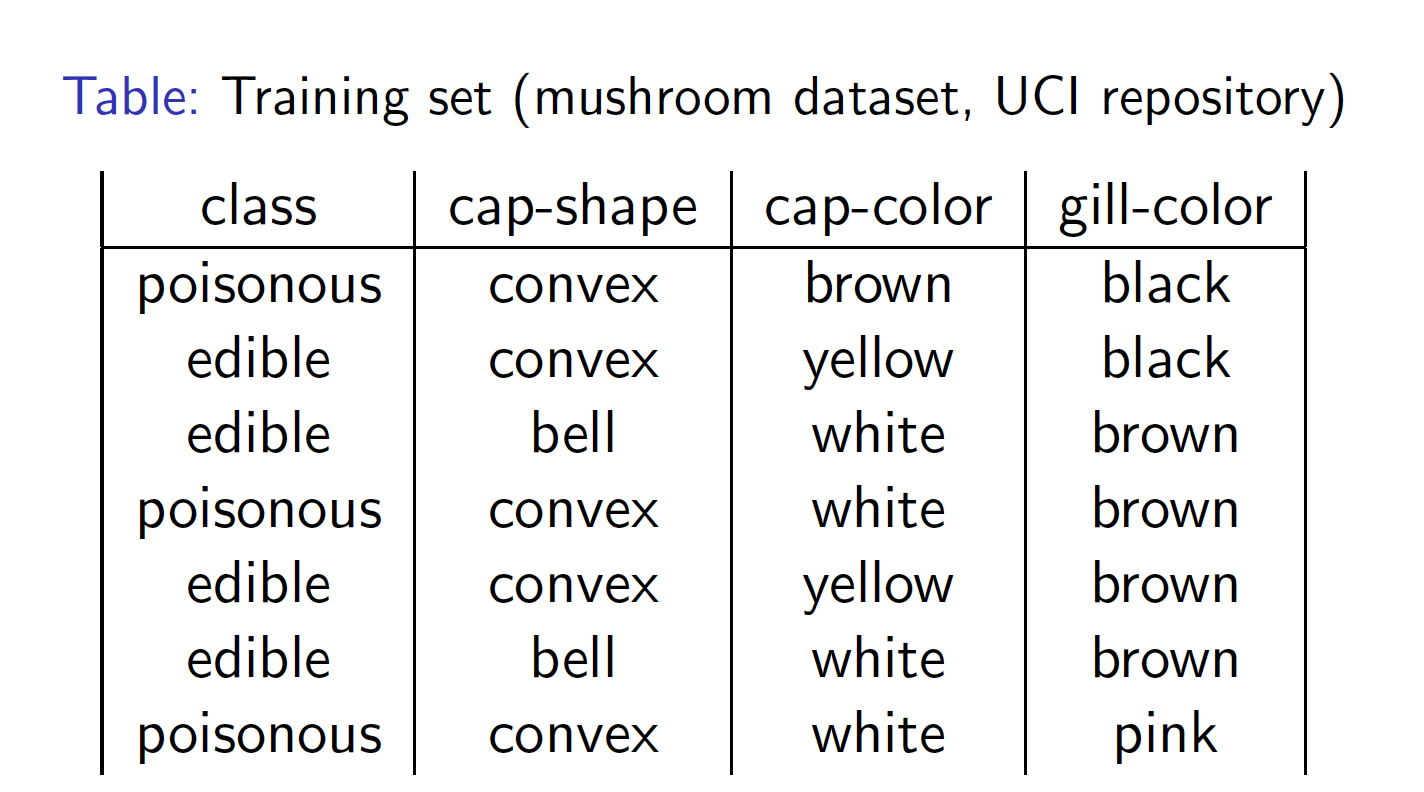


**Example: Constructing a decision tree:** 
For each feature, we shoud evaluate how well it splits the data in classes in such a way that each value of the feature contains only one of the classes. One of the evaluation measures is to count how many observations are classified according to the majority of classes in each feature value. Fos instance, the feature cap-shape has two features: convex and bell. If we choose convex, most of the observations are poisonous (3 over a total of 5). A value bell classifies the two observations as edible, so the total goodness of the feature will be (3+2)/7 = 0.71. We proceed similarly with the other features and the result is that all are equally good. So we can choose one of them randomly. Image we select the feature cap-color to split the data. Then we will have three groups according to the three possible values of the feature cap-color. For the value cap-color = brown, the tree ends classifying the observation as poisonous. Something similar occurs for the value yellow,  for which the two observations are classified as edible. In the case cap-color = white we should further develop the tree using the remaining features. For this reduced set ob 4 observations, we should evaluate the goodness of each of the features. Selecting the feature cap-shape will have a goodness of (2+2)/4 = 1 since the valuers bell correctly classify all obsdervations as edible and the value convex as poisonous. The feature gill-color can not do it better: The performance is (2+1)/4=0.75. Then we choose cap-shape and proceed to complete the decision tree as in the following figure: 

decision_tree_result.png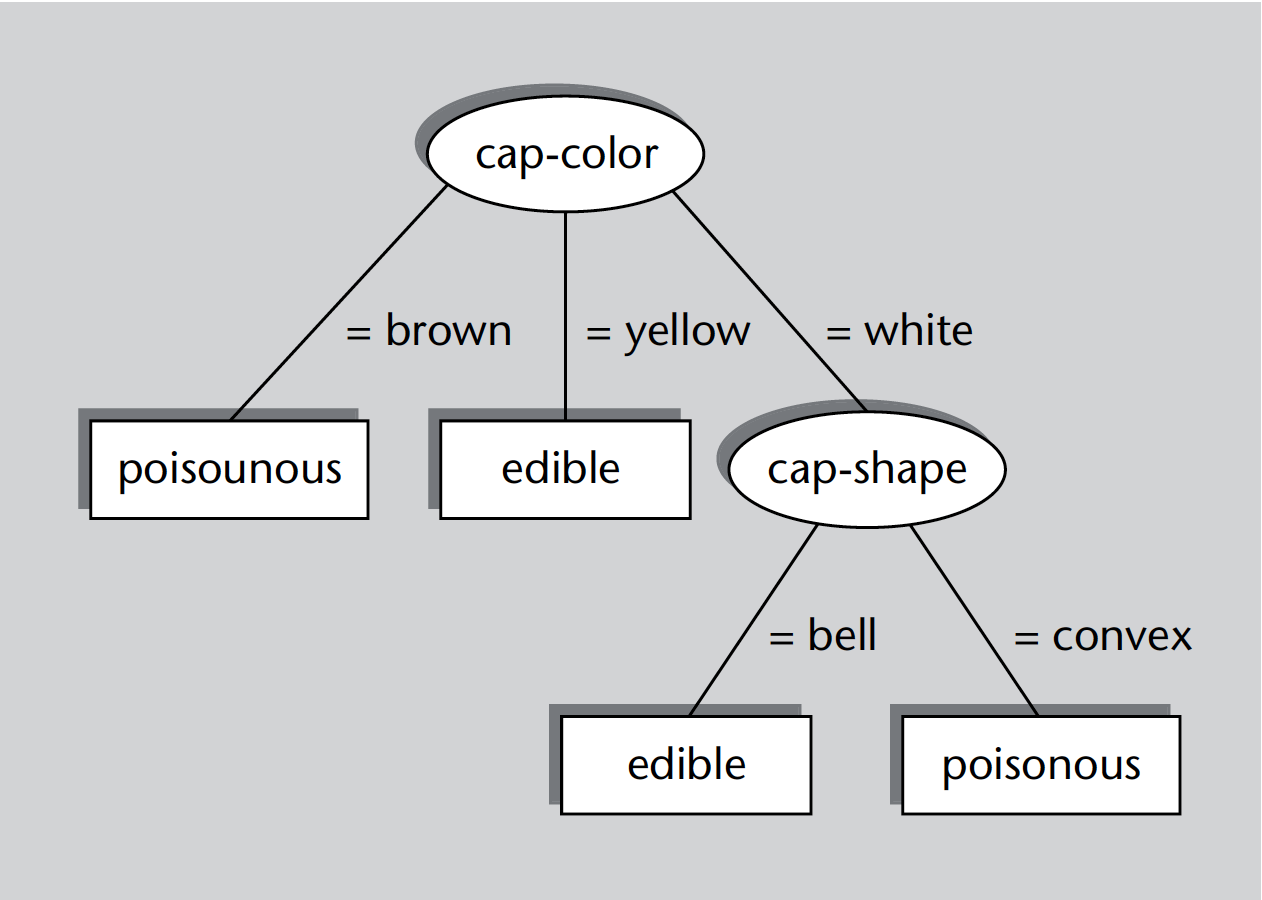

In [91]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("agaricus-lepiota.data")
data.columns=["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing",
                                                    "gill-size","gill-color","stalk-shape","stalk-root",
                                                    "stalk-surface-above-ring","stalk-surface-below-ring",
                                                    "stalk-color-above-ring","stalk-color-below-ring",
                                                    "veil-type","veil-color","ring-number","ring-type",
                                                    "spore-print-color","population","habitat"]

# numeric coding of variables
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

    
y = data['class'].values
X = data.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.30, random_state=21)
    

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


Represent the resulting tree structure for the test data:

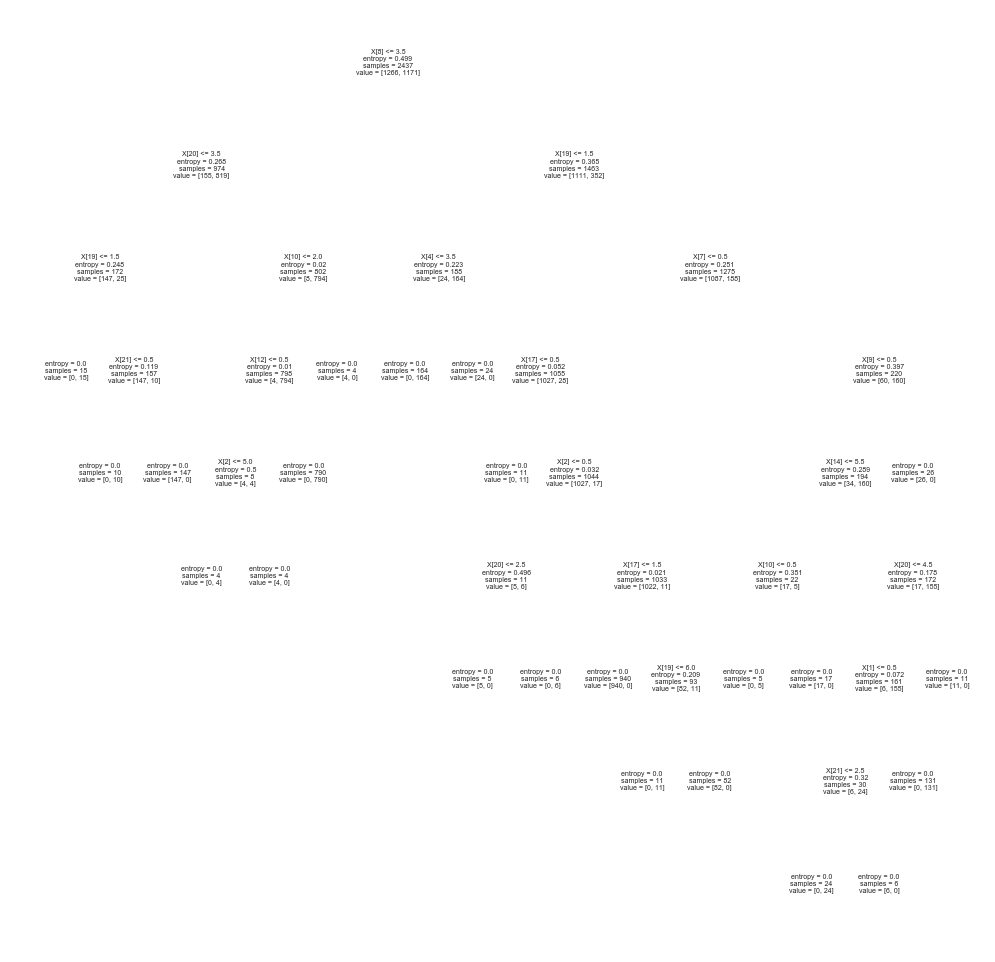

In [92]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(X_test,Y_test)) 
plt.show()

** EXERCISE: Represent the decision boundary of the tree in a mutildimensional scatter plot (numerical features):**

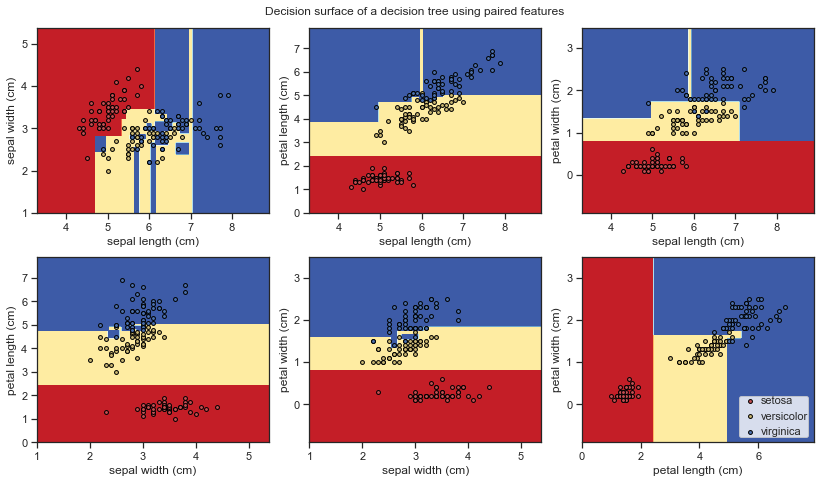

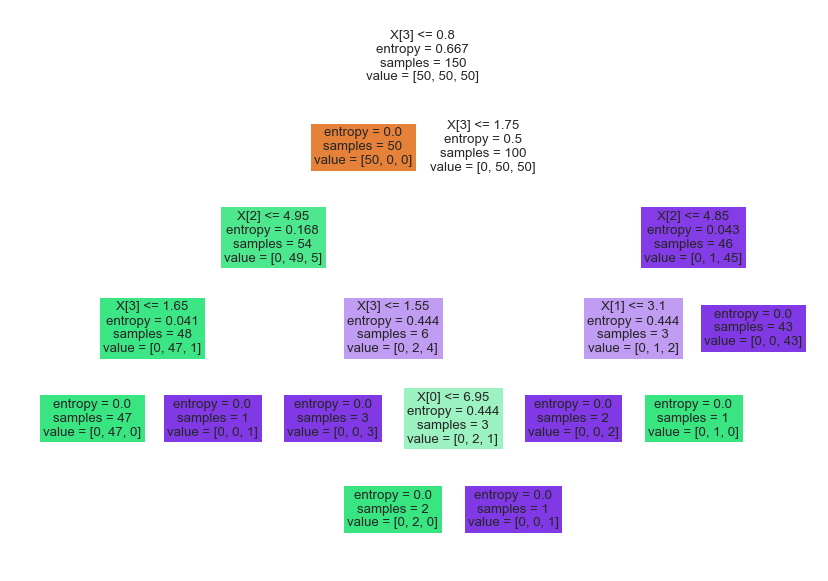

In [93]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## 3.5 SUPPORT VECTOR MACHINES (SVM's):

kernel trick.png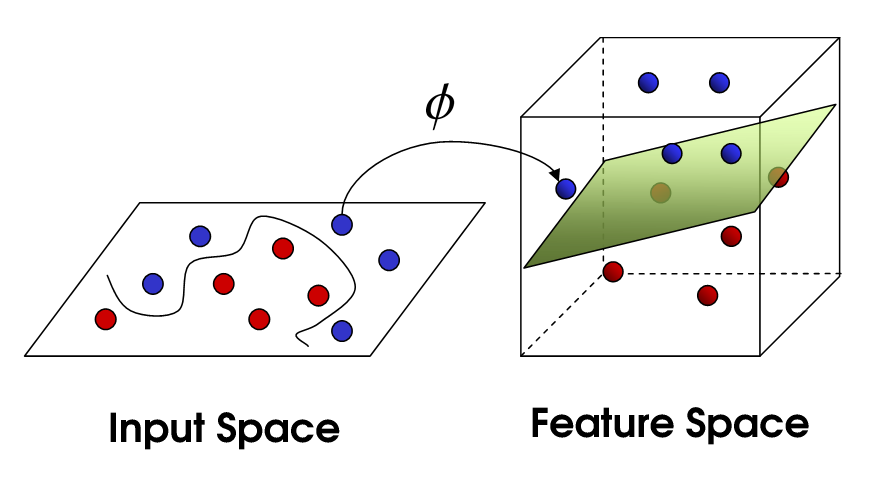

Imagine a set of observations that are not linearly separable in the original dimension of the problem. Apply the **Kernel Trick**:

[1] Apply a nonlinear projection (kernel) of the data points into a higher dimensional space to make the problem linearly separable. 

[2] Common nonlinear transformations are: polynomial, Gausssian, Radial Basis Functions. 

[3] Fit a linear discriminant in the augmented space: Use a labelled training set to find the separating hyperplane with largest separation between classes.

[4] The {\em Support vectors} are the training observations that define the optimal separating hyperplane. 

[5] Apply the same projection to predict the class of a new test observation. 


In [33]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

X = iris.data
y = iris.target
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1, gamma=1)

results = model.fit(X, y)
scores = model.score(X, y)

#Predict Output
x_test = X[0:1] # predict observation 1 (class 0)
predicted = model.predict(x_test)
print(predicted)

[0]


**TUNNING THE SVM HYPERPARAMETERS:** 

Optimal search algorithm over different models and parameters:

In [34]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## 3.6 ARTIFICIAL NEURAL NETWORKS (ANNs)


Given an input vector $\vec{x} = \{x_1,\dots,x_n\}$, the perceptron provides an output: 
\begin{equation*}
y_{out} = f(\sum_{i=1}^n w_i x_i + b)
\end{equation*}
where $f$ is a nonlinear function, $\vec{w}$ are the {\em synaptic weights} and $b$ the bias. 
When the nonlinear function $f(x)$ is binary on $x$, we have {\bf the perceptron}. 
Other usual choices for $f(x)$ are sigmoidal function $f(x)=\frac{2}{1+e^{-2x}}-1$, or radial basis $f(x)=e^{-x^2}$.

Consider a layer of $m$ neurons connected to $n$ inputs with weights $w_{ji}$: 
\begin{equation*}
z_i = g_i(\sum_{j=1}^n w_{ji} x_j + b), i=1,\dots,m
\end{equation*}
And the $p$ outputs of the network are given by:
\begin{equation*}
y_k = g_{out}(\alpha_k + \sum_{i=1}^n w_{ik} z_i), \, k=1,\dots,p
\end{equation*}
Once we choose an artificial neural network architecture, we apply a {\bf learning algorithm} to determine the weights and bias of the network from a set of training data in which input are observations and output are class labels.

ann.jpeg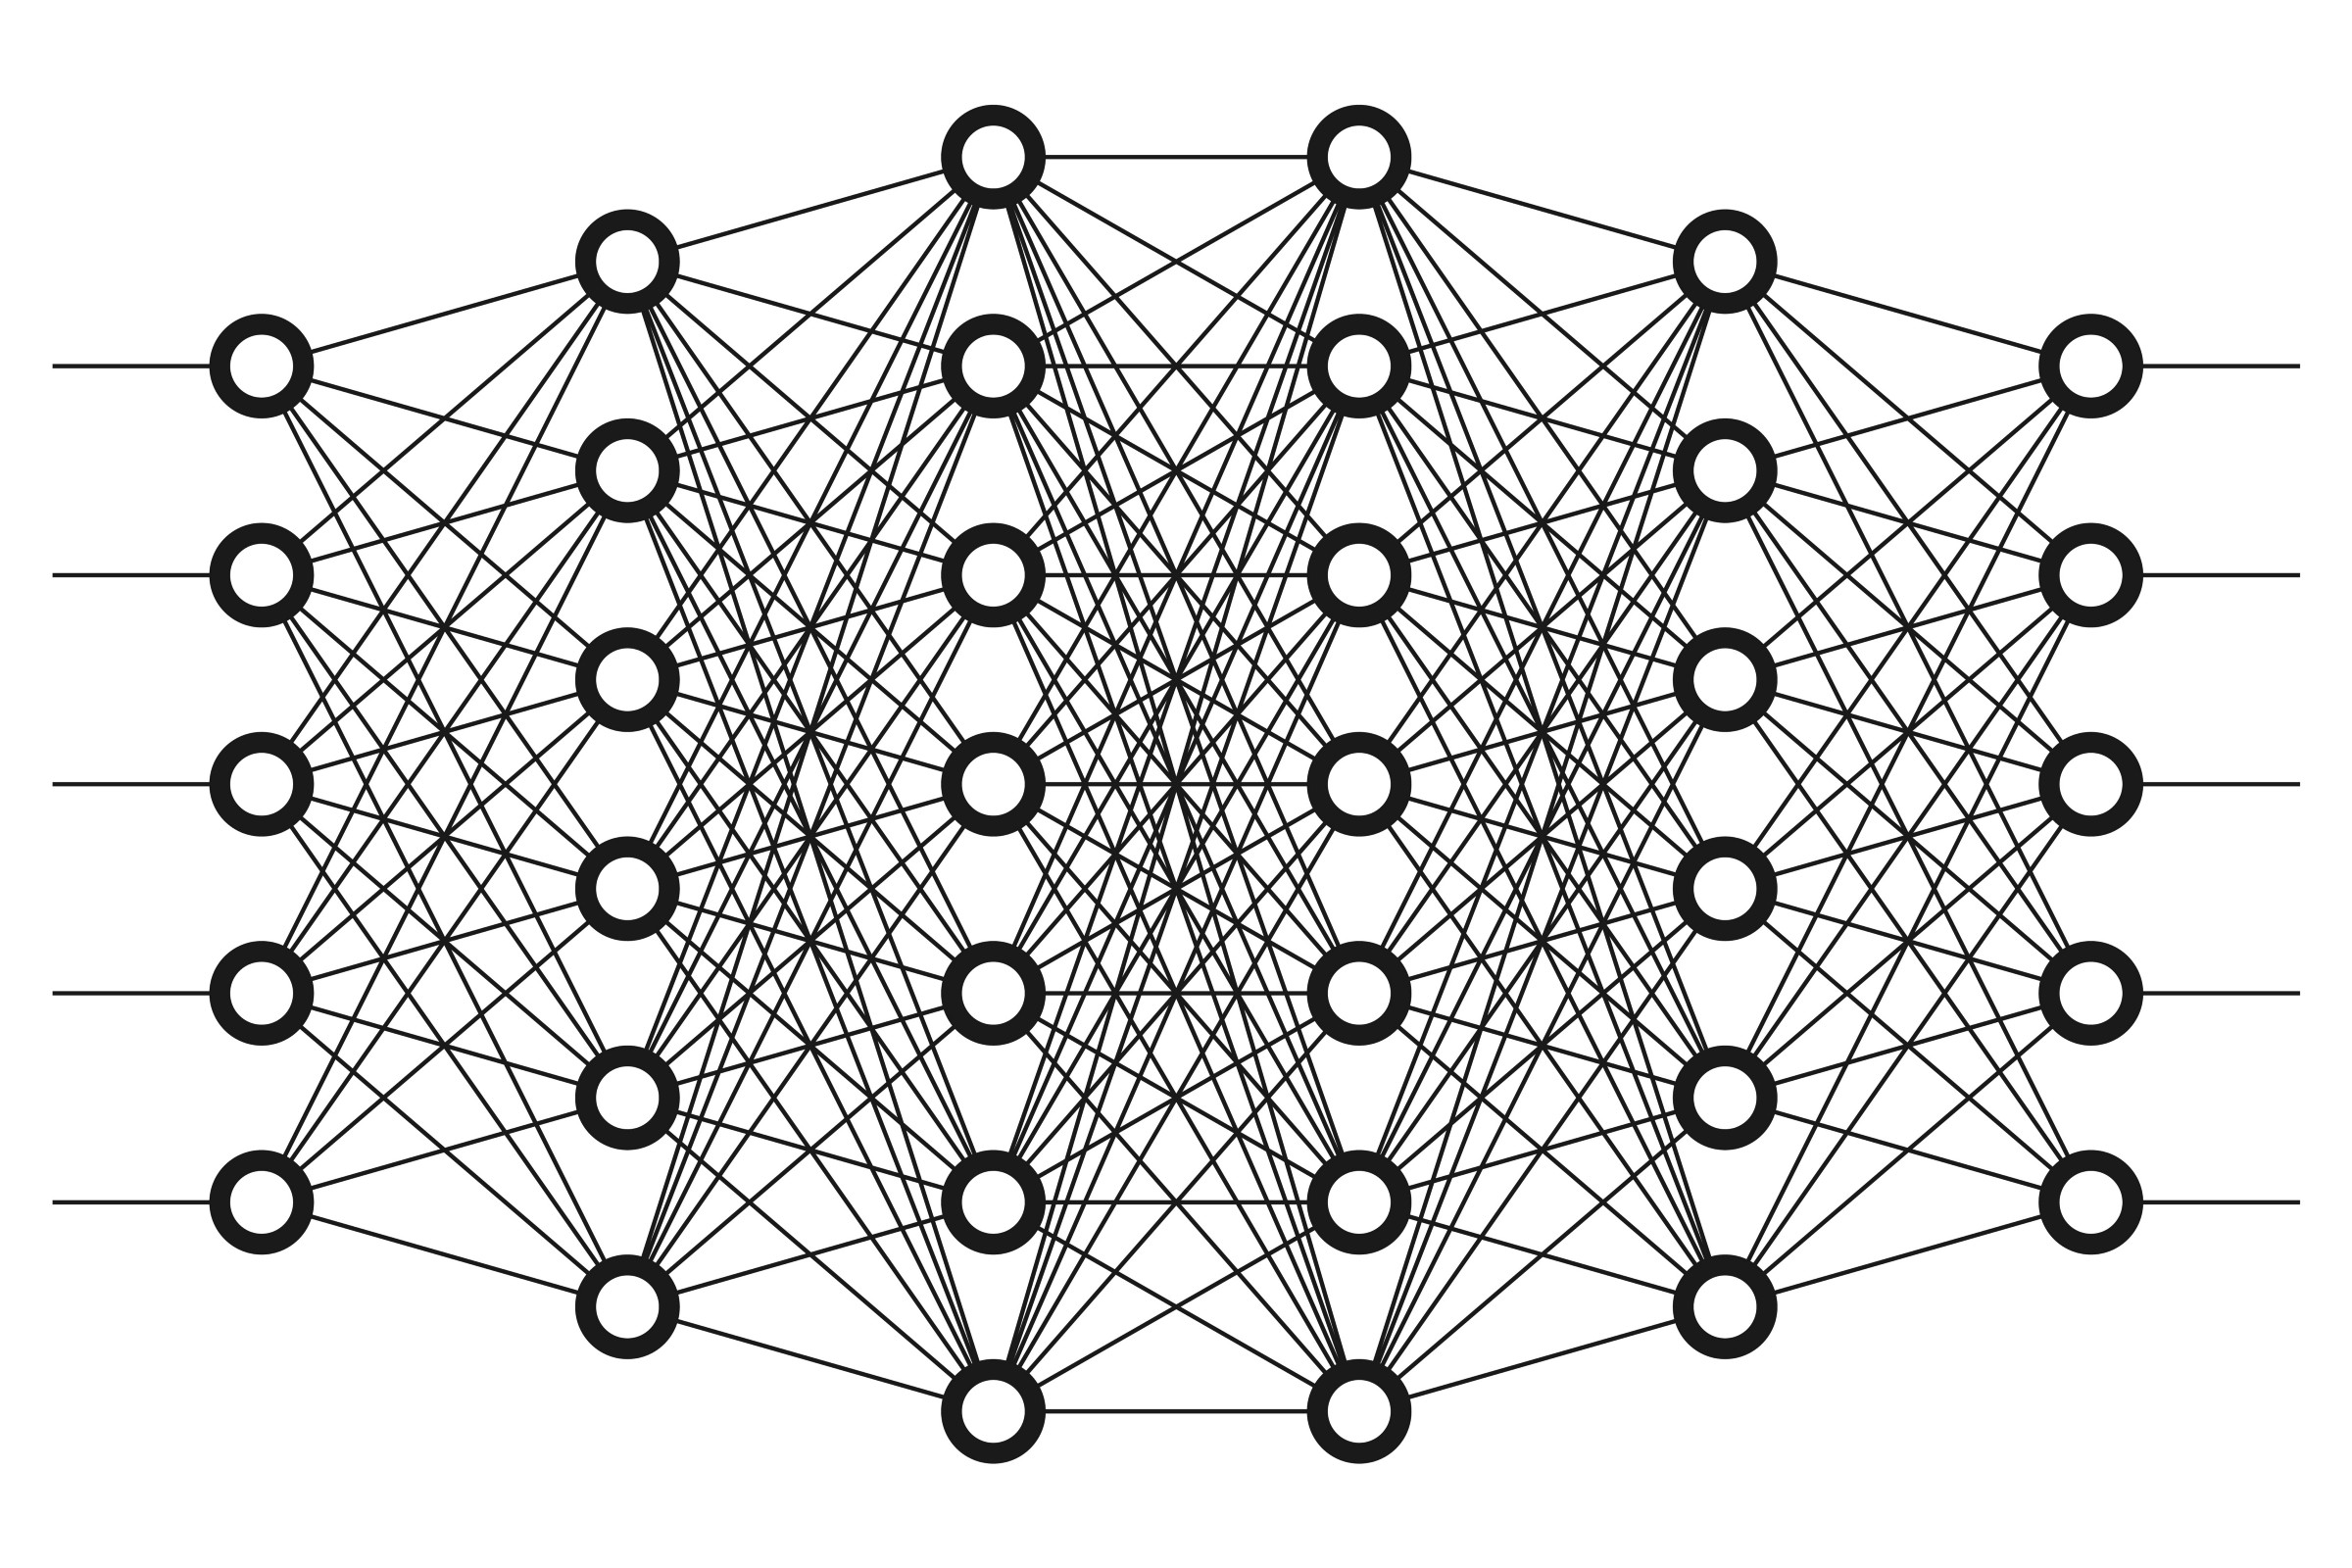



### A GUI to understand the relevance of structure and parameters in ANNs:

Tinkering an artificial neural network with TensorFlow


http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,1&seed=0.82329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

### Understanding the backpropagation algorithm:
Adapted from https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/


In [96]:
# 1. Initialize network:

from random import seed
from random import random
from math import exp

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)
    
    

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


**2. Forward Propagate**
We can break forward propagation down into three parts:


* Neuron Activation: activation = sum(weight_i * input_i) + bias ; bias = weight_0
* Neuron Transfer
* Forward Propagation 

**2.1 Neuron Activation:**
$activation = \sum(weight_i * input_i) + bias$ 
bias = weight_0

In [97]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

**2.2 Neuron Transfer**

We can transfer an activation function using the sigmoid function:

output = 1 / (1 + e^(-activation))

In [98]:
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

**2.3 Forward Propagation:**

We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer.

In [99]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

Let's check it. 

Running the example propagates the input pattern [1, 0] and produces an output value that is printed. Because the output layer has two neurons, we get a list of two numbers as output.

In [100]:
seed(1)
network = initialize_network(2, 1, 2)
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


### 3. Back Propagate Error

Error is calculated between the expected outputs and the outputs forward propagated from the network. These errors are then propagated backward through the network from the output layer to the hidden layer, assigning blame for the error and updating weights as they go.

This part is broken down into two sections.

* Transfer Derivative
* Error Backpropagation

**3.1 Transfer Derivative**

Since activation function is the sigmoid function:

output = 1 / (1 + e^(-activation))

then,

derivative = output * (1.0 - output)

In [101]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

**3.2 Error Backpropagation**

The error for each neuron in the output layer, propagate backwards through the network can be calculated as follows:

error = (expected - output) * transfer_derivative(output)

The error signal for a neuron in the hidden layer is calculated as the weighted error of each neuron in the next layer. Think of the error traveling back along the weights of the next layer to the neurons in the current layer:

error = (weight_k x error_j) * transfer_derivative(output)

In [102]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

For example:

In [103]:
seed(1)
network = initialize_network(2, 1, 2)
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[0.6629970129852887, 0.7253160725279748]
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941, 'delta': -0.002711797799238243}]
[{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887, 'delta': -0.14813473120687762}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748, 'delta': 0.05472601157879688}]


### 4. Train Network

The network is trained iteratively using stochastic gradient descent.

This part is broken down into two sections:

* Update Weights
* Train Network

**4.1 Update Weights**

Network weights are updated as follows:


weight = weight + learning_rate · error · input


In [104]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

**4.2 Train Network**

Training involves first looping for a fixed number of epochs and within each epoch updating the network for each row in the training dataset.

In [105]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

Time to test the complete algorithm:

In [106]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
[{'weights

### 5. Predict

We have already seen how to forward-propagate an input pattern to get an output. This is all we need to do to make a prediction. 

In [107]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

.... and our prediction on the training set is:

In [108]:
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


## 3.7 PERFORMANCE EVALUATION


- General testing procedure 
- Performance measures
- k-fold cross-validation


In [109]:
### General testing procedure:

In [110]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Validation using training data: Wrong! 

In [111]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_pred = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

Split data in training & test subsets and validate using test: 

In [112]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(Xtrain, ytrain)

# evaluate the model on the second set of data
ytest_pred = model.predict(Xtest)
accuracy_score(ytest, ytest_pred)

0.9066666666666666

### Performance measures:

confusion matrix.png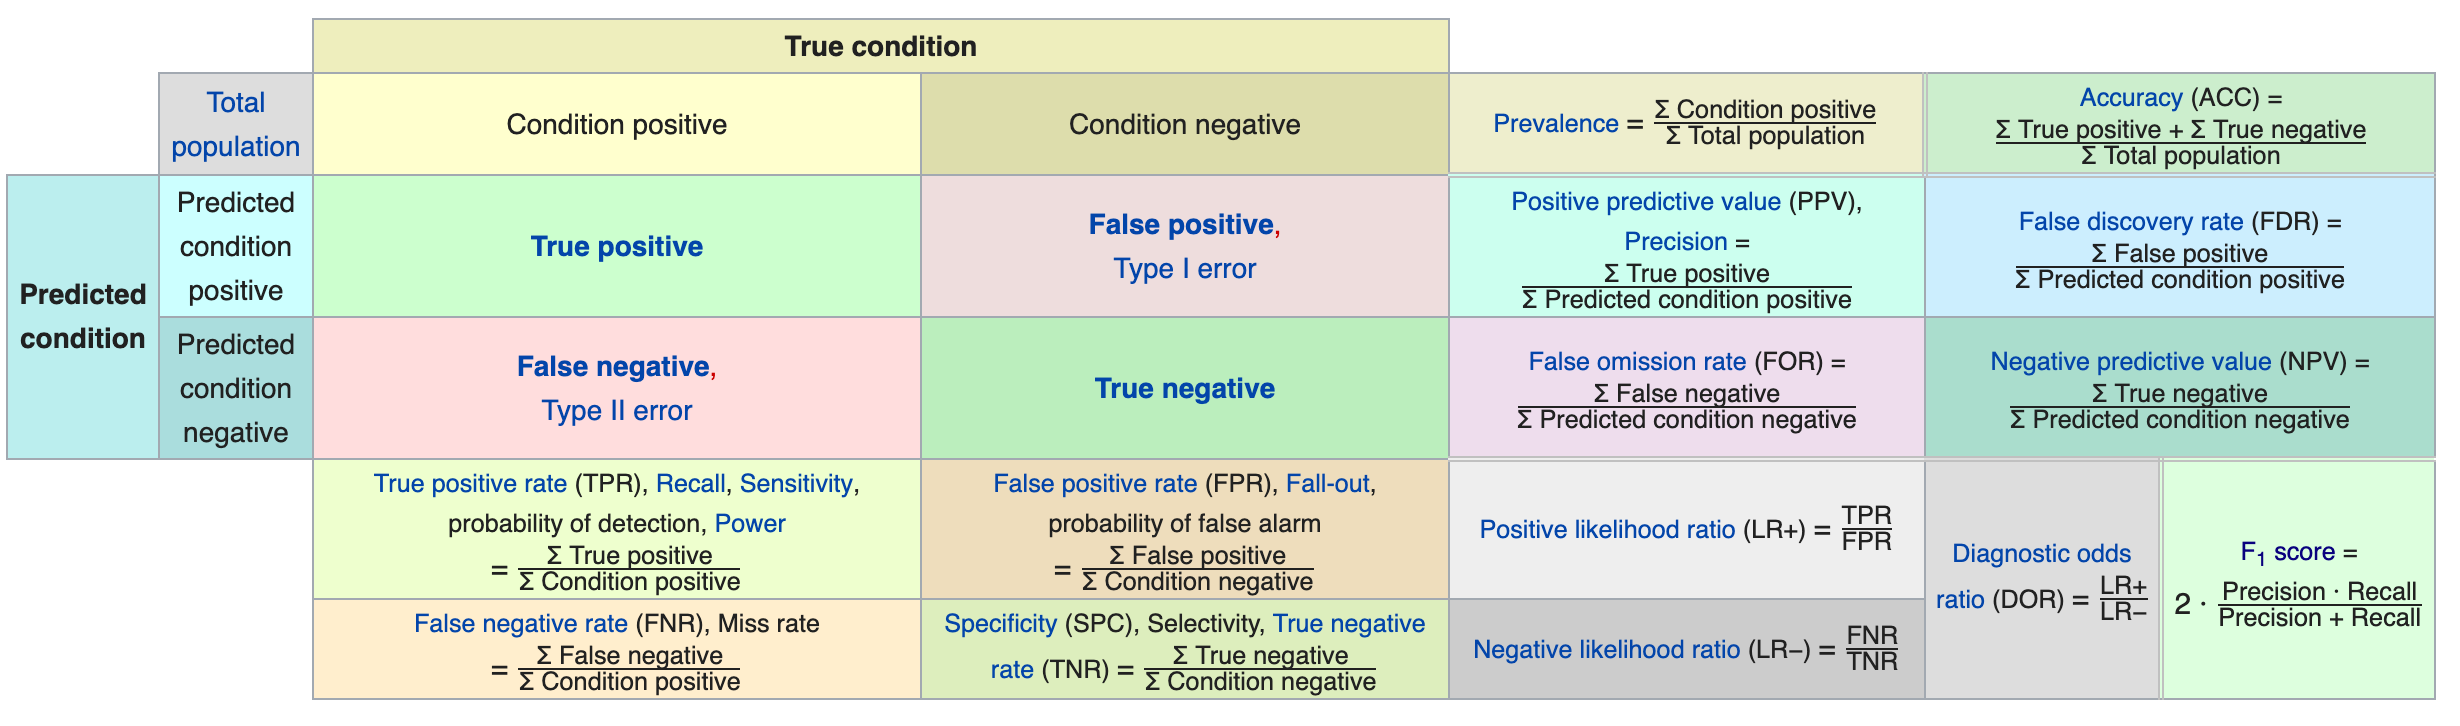

Classification report:

In [113]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



Confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ytest_pred)

array([[21,  0,  0],
       [ 0, 28,  2],
       [ 0,  5, 19]])

Description of the available performance scores in sklearn libraries:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### k-fold Cross-validation

kfold.gif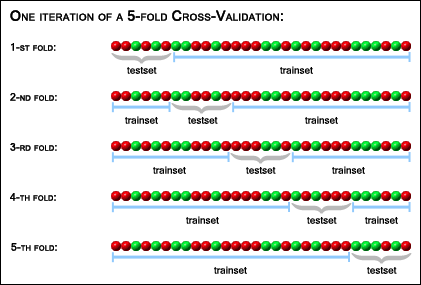

In [115]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [116]:
from sklearn import metrics
f1_scores = cross_val_score(model,X,y, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


k-fold cross-validation:

In [117]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] TEST: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 1

In [118]:
kf1 = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf1,scoring='accuracy')

array([1.   , 1.   , 0.867, 0.933, 0.833])

Custom performance metrics

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
def tn(y, y_pred): return confusion_matrix(y, y_pred)[0, 0]
def fp(y, y_pred): return confusion_matrix(y, y_pred)[0, 1]
def fn(y, y_pred): return confusion_matrix(y, y_pred)[1, 0]
def tp(y, y_pred): return confusion_matrix(y, y_pred)[1, 1]
tn_score = make_scorer(tn)
fp_score = make_scorer(fp)
fn_score = make_scorer(fn)
tp_score = make_scorer(tp)

In [120]:
[tn(ytest,ytest_pred)
,fp(ytest,ytest_pred)
,fn(ytest,ytest_pred)
,tp(ytest,ytest_pred)]

[21, 0, 0, 28]

In [121]:
tp_score(model,X,y)

48

Multiple performance measures

In [122]:
from sklearn.model_selection import cross_validate
custom_scores = {'tp': tp_score, 'tn': tn_score,'fp': fp_score, 'fn': fn_score}
cv_results = cross_validate(model,X,y,cv=10,scoring=custom_scores,return_train_score=True)

cv_results

{'fit_time': array([0.001, 0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 'score_time': array([0.01 , 0.006, 0.006, 0.007, 0.011, 0.008, 0.007, 0.006, 0.006,
        0.006]),
 'test_tp': array([5, 5, 5, 5, 3, 5, 4, 5, 5, 5]),
 'train_tp': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_tn': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'train_tn': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

**Exercise: Understanding different performance measures:**

Take a look to the following article discussing how different performance measures capture different 

types of errors in classification problems: 

https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c

Use the data in the example in order to create a MATLAB/Python code that computes the confusion matrix and the Reciever-Operating-Characteristic curve (ROC). Upload the codes so that we can share them with your class mates. 

The main objective of this activity is that you get a critical understanding of the different measures and how do they actually capture the relevant errors in your specific problem.



In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA

# Data vector
# Read .txt document (file has to be in the same folder as this program)
data = pd.read_csv('Data_article.txt', sep=",", header = None)
position = data[:][0]
actualclass = data[:][1]
score = data[:][2]

# Set a threshold to obtain the confusion matrix
# The same results can be obtained using "sklearn" library
string = input("Set your threshold: ")
thresh = float(string)
TP = 0
FP = 0
FN = 0
TN = 0
for i in range(0, np.size(position)):
    # Actual class: POSITIVE
    # Supposed class: POSITIVE
    if ( (score[i] >= thresh) & (actualclass[i] == 1) ):
        confvect = 'TP'
        TP = TP + 1
    # Actual class: NEGATIVE
    # Supposed class: POSITIVE
    elif ( (score[i] >= thresh) & (actualclass[i] == 0) ):
        confvect = 'FP'
        FP = FP + 1
    # Actual class: POSITIVE
    # Supposed class: NEGATIVE
    elif ( (score[i] < thresh) & (actualclass[i] == 1) ):
        confvect = 'FN'
        FN = FN + 1
    # Actual class: NEGATIVE
    # Supposed class: NEGATIVE
    elif ( (score[i] < thresh) & (actualclass[i] == 0) ):
        confvect = 'TN'
        TN = TN + 1

# Model evaluation indicators
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
Fscore = (2*Recall*Precision)/(Recall+Precision)
print([Accuracy, Recall, Precision, Fscore])

Set your threshold: 0.1
[0.15, 1.0, 0.15, 0.2608695652173913]


## Comparing different classification methods over different datasets:

Automatically created module for IPython interactive environment


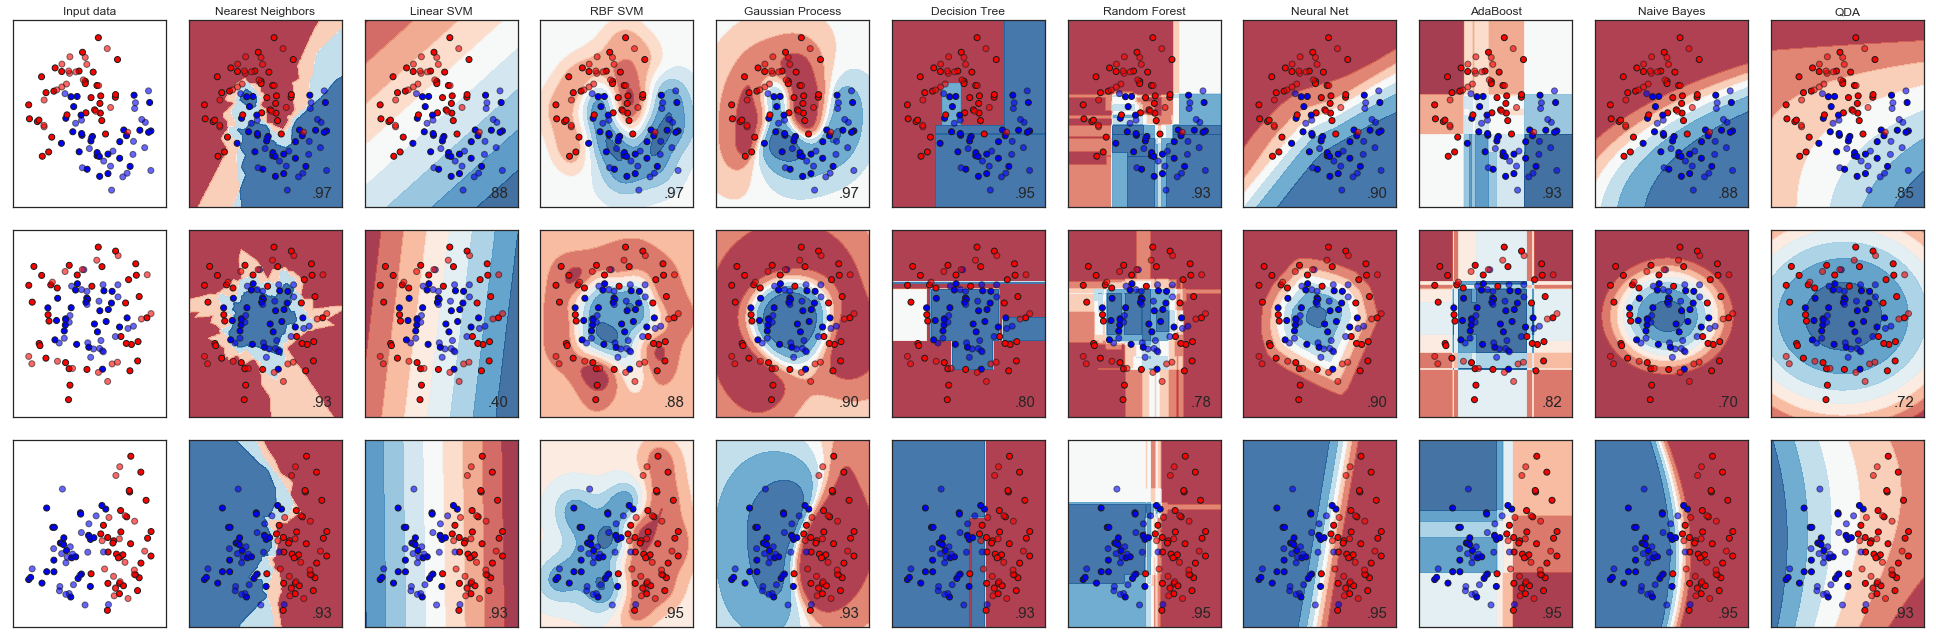

In [125]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# 4. INTRODUCTION TO DEEP LEARNING: 

https://keras.io/getting-started/sequential-model-guide/

deep learning.png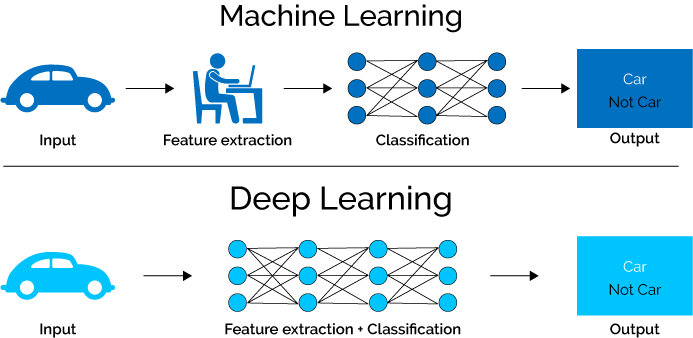

## Convolutional Neural Networks (CNN's)

Introduction and book: 
https://torres.ai/deep-learning-inteligencia-artificial-keras/

figmnist.png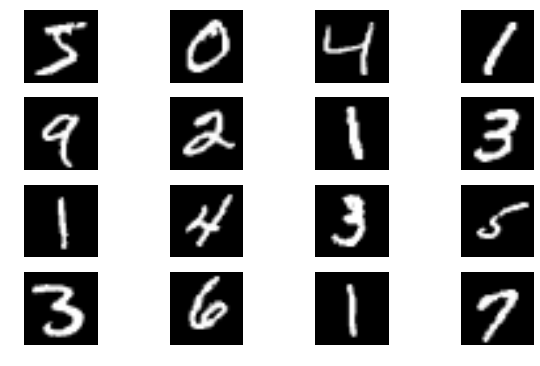

In [179]:
# Cargar la base de datos MNIST y librerias Keras:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# Establecer la semilla del generador de numeros aleatorios para garantizar reproducibilidad de los resultados 
seed = 7
numpy.random.seed(seed)

# Acceder a las imagenes de entrenamiento y test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dimensionar las imagenes en vectores 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalizar las imagenes de escala de grises 0-255 (valores entre 0-1):
X_train = X_train / 255
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos con diez posiciones: 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Funcion en la que se define la arquitectura del modelo:
def baseline_model():
# Capa de entrada:
	model = Sequential() 
# Primera capa (Convolucional):
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu')) 	
# Tercera capa (agrupamiento):
	model.add(MaxPooling2D(pool_size=(2, 2))) 
# Cuarta capa (regularizacion)
	model.add(Dropout(0.2))
# Quinta capa (redimensionamiento): 
	model.add(Flatten())
# Sexta capa (completamente conectada)
	model.add(Dense(128, activation='relu')) 
# Capa de salida (softmax):
	model.add(Dense(num_classes, activation='softmax')) 
# Compilar el modelo y especificar metodo y metrica de optimizacion:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# Llamada al modelo: 
model = baseline_model()

# Ajustar el modelo utilizando los datos de entrenamiento y validacion con los de test:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)

# Evaluacion del modelo utilizando los datos de test:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Exactitud del modelo: %.2f%%" % (100*scores[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 85s - loss: 0.2234 - acc: 0.9367 - val_loss: 0.0796 - val_acc: 0.9745
Epoch 2/3
 - 84s - loss: 0.0712 - acc: 0.9784 - val_loss: 0.0453 - val_acc: 0.9850
Epoch 3/3
 - 91s - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0447 - val_acc: 0.9855
Exactitud del modelo: 98.55%


## Transfer Learning: Using modes pre-trained with another dataset:

https://keras.io/getting-started/faq/#how-can-i-use-pre-trained-models-in-keras


In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=True)


**EXAMPLE: Deep learning for image segmentation:**

Compare different approaches: See jupyter notebook 'segmentation_approaches_final.ipynb' in folder 'deep learning CNNs'. 

Results.png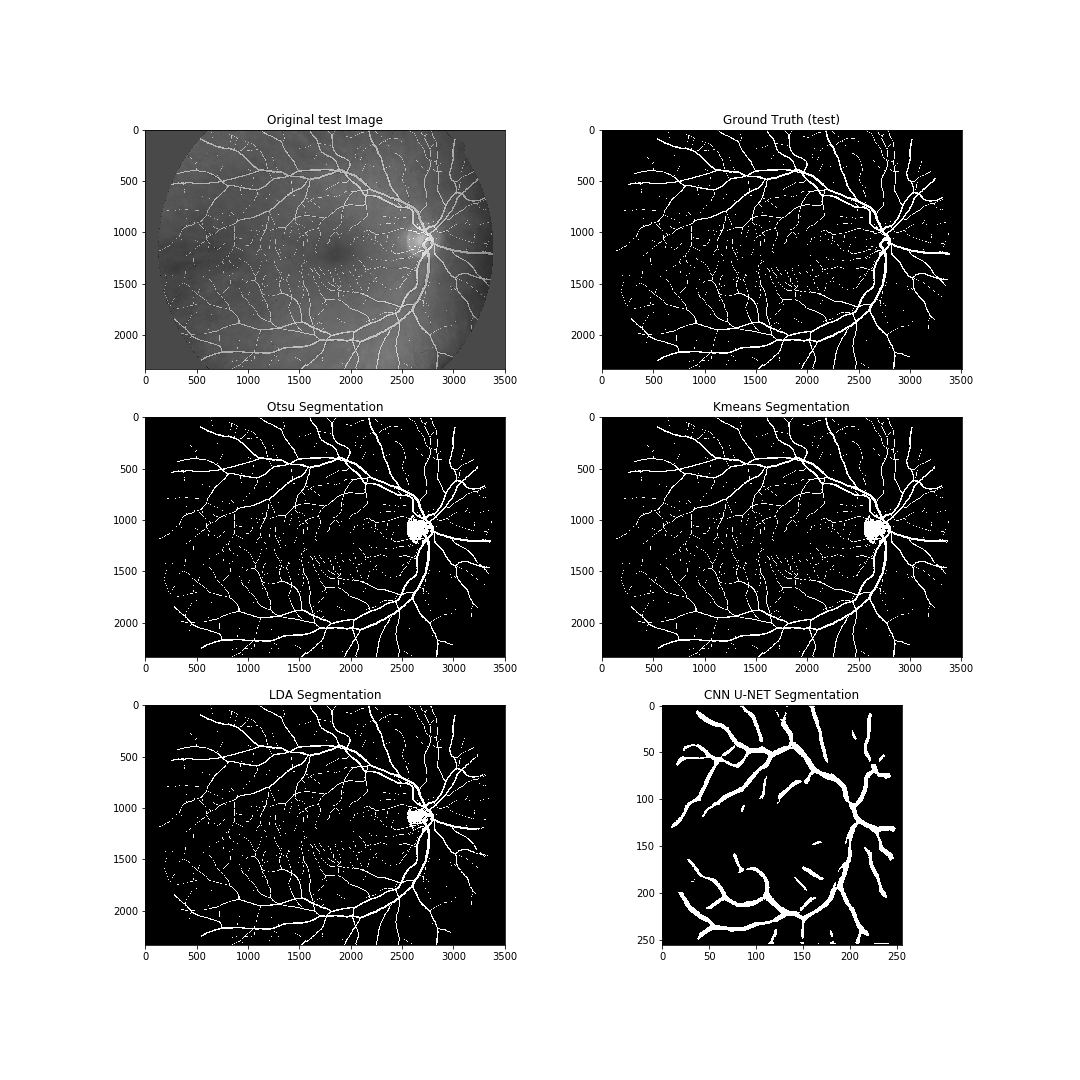

## Recurrent Neural Networks:

RNN's is an ANN architecture that allows processing sequential data: The simple example is a sequence of words (texT). First words get transformed into machine-readable vectors. The RNN processes the sequence of vectors one by one.

RNNs.png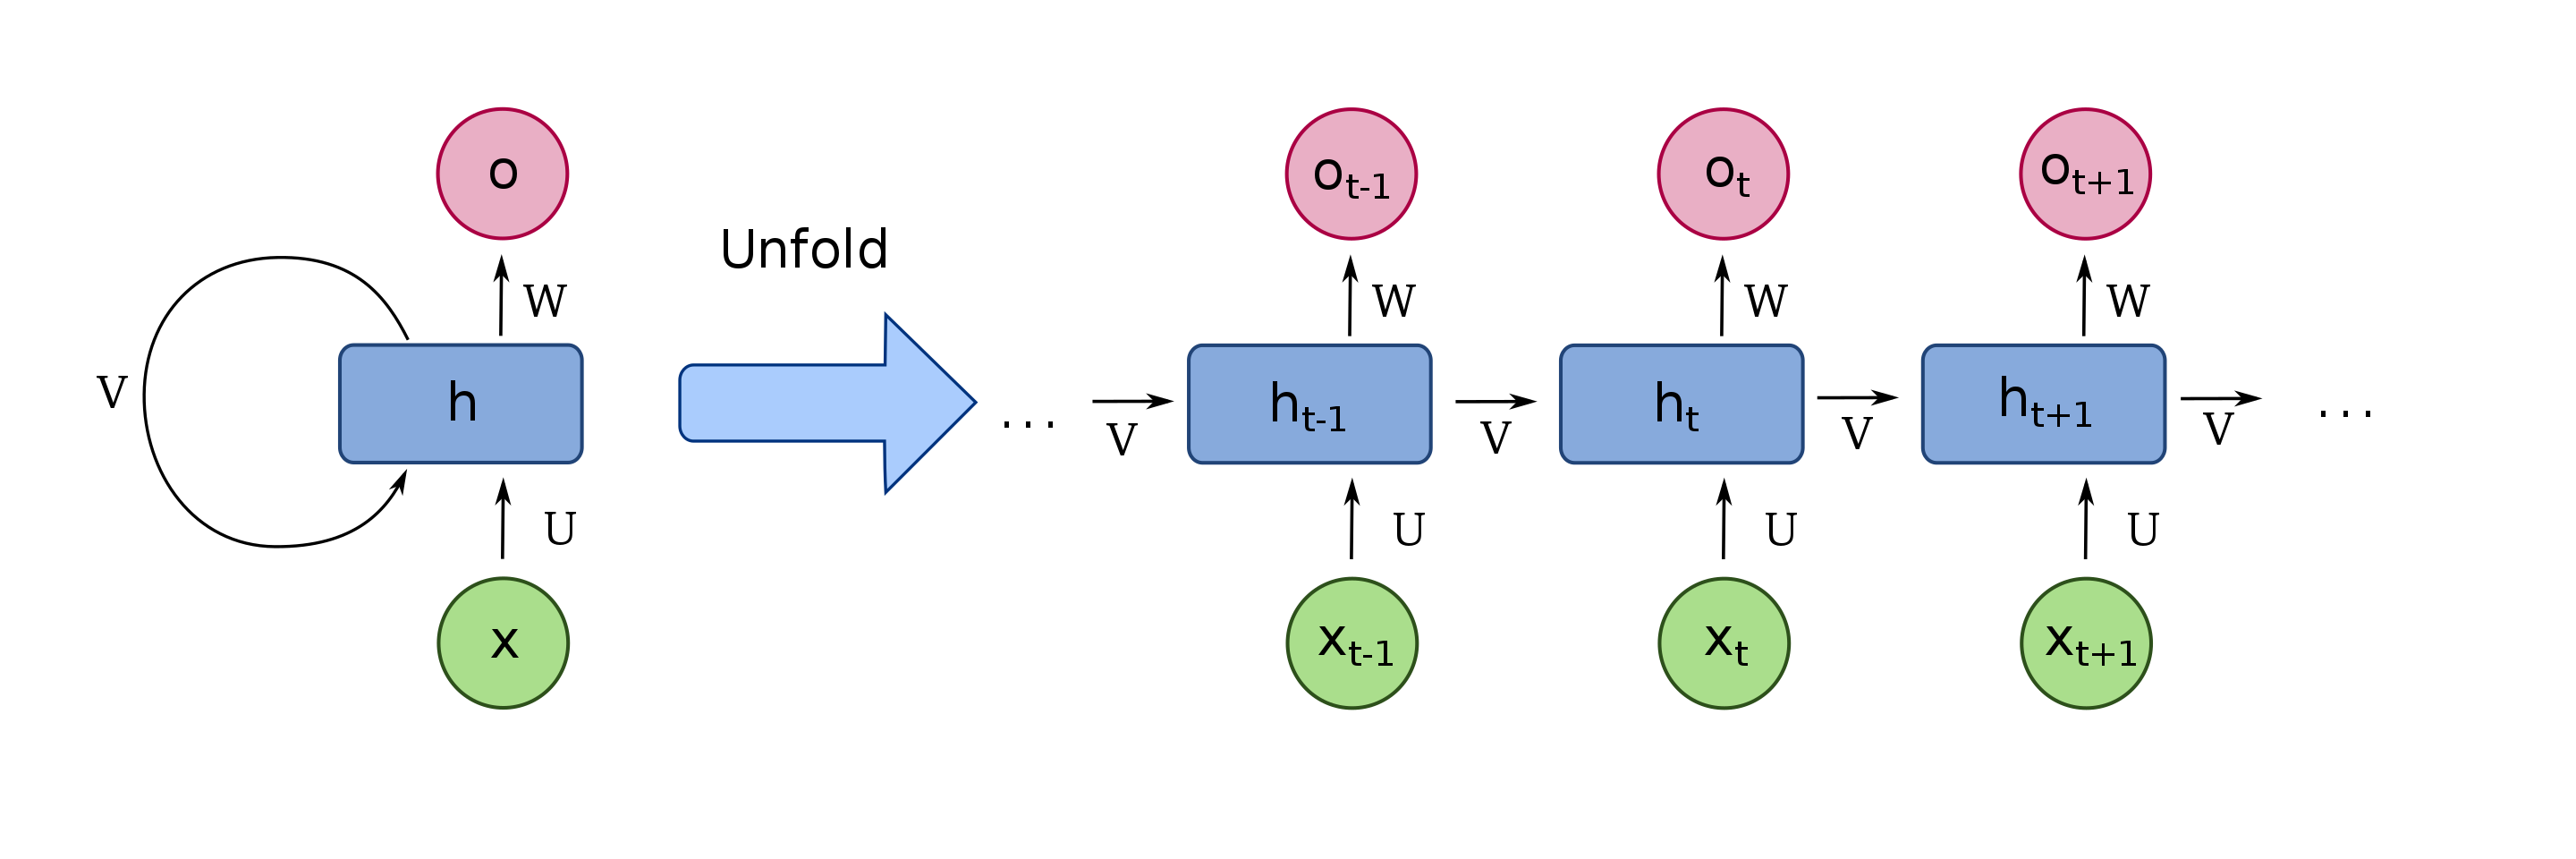

RNN’s are good for processing sequence data for predictions but suffers from short-term memory. 

### Long Short-Time Memory networks:

LSTM’s and GRU’s were created as a method to mitigate short-term memory using mechanisms called gates. Gates are just neural networks that regulate the flow of information flowing through the sequence chain. LSTM’s and GRU’s are used in state of the art deep learning applications like speech recognition, speech synthesis, natural language understanding, etc.

The behavior of the LSTM unit is controlled by three «doors» (gates): the
input gate ($i_t$), which controls whether a new value enters the memory; the forget gate ($f_t$), which controls whether an existing value has to be replaced by a new value, and the output gate ($o_t$), which controls whether the stored value is used by Calculate the activation function and, therefore, the output of the unit. The values of
The doors depend, in turn, on the weights learned by the unit. These gates can learn which data in a sequence is important to keep or discarded as non-relevant.


The IMDB website (Internet Movie DataBase) is one of the movie sites and movies
Most popular on the internet. The thousands of opinions written by the users have been
Seized to create a corpus of written opinions along with an evaluation that
Indicates whether they are positive or negative. We will use this data set for
Train an RNN as a binary classifier.


**Example: IMDB classification:** 


In this text processing example there are many different words
(twenty thousand). If we use a simple coding, we will have to represent each word
as a vector of 20,000 bits, in which all will be worth zero minus it
corresponding to the word that comes in every moment. This is very inefficient
computationally and poorly from the point of view of representation
of the information. For this reason, what is usually done in these cases is to generate
an embedding of data in a vector space of many
fewer dimensions, of the order of one hundred. Every word in the corpus is
It will become a point in this vector space, which in addition to condensing
The information helps to associate close concepts. To achieve this
A projection layer is created, the output of which is vectors in space
projected vector This, in addition, is much more efficient computationally
Speaking and simplifying the design of the network, since the output layer of
Projection has a reasonable size as input for the following layers.
It is important to note that the same layer is the one that learns the projection more
adequate during network training.

LTSM.png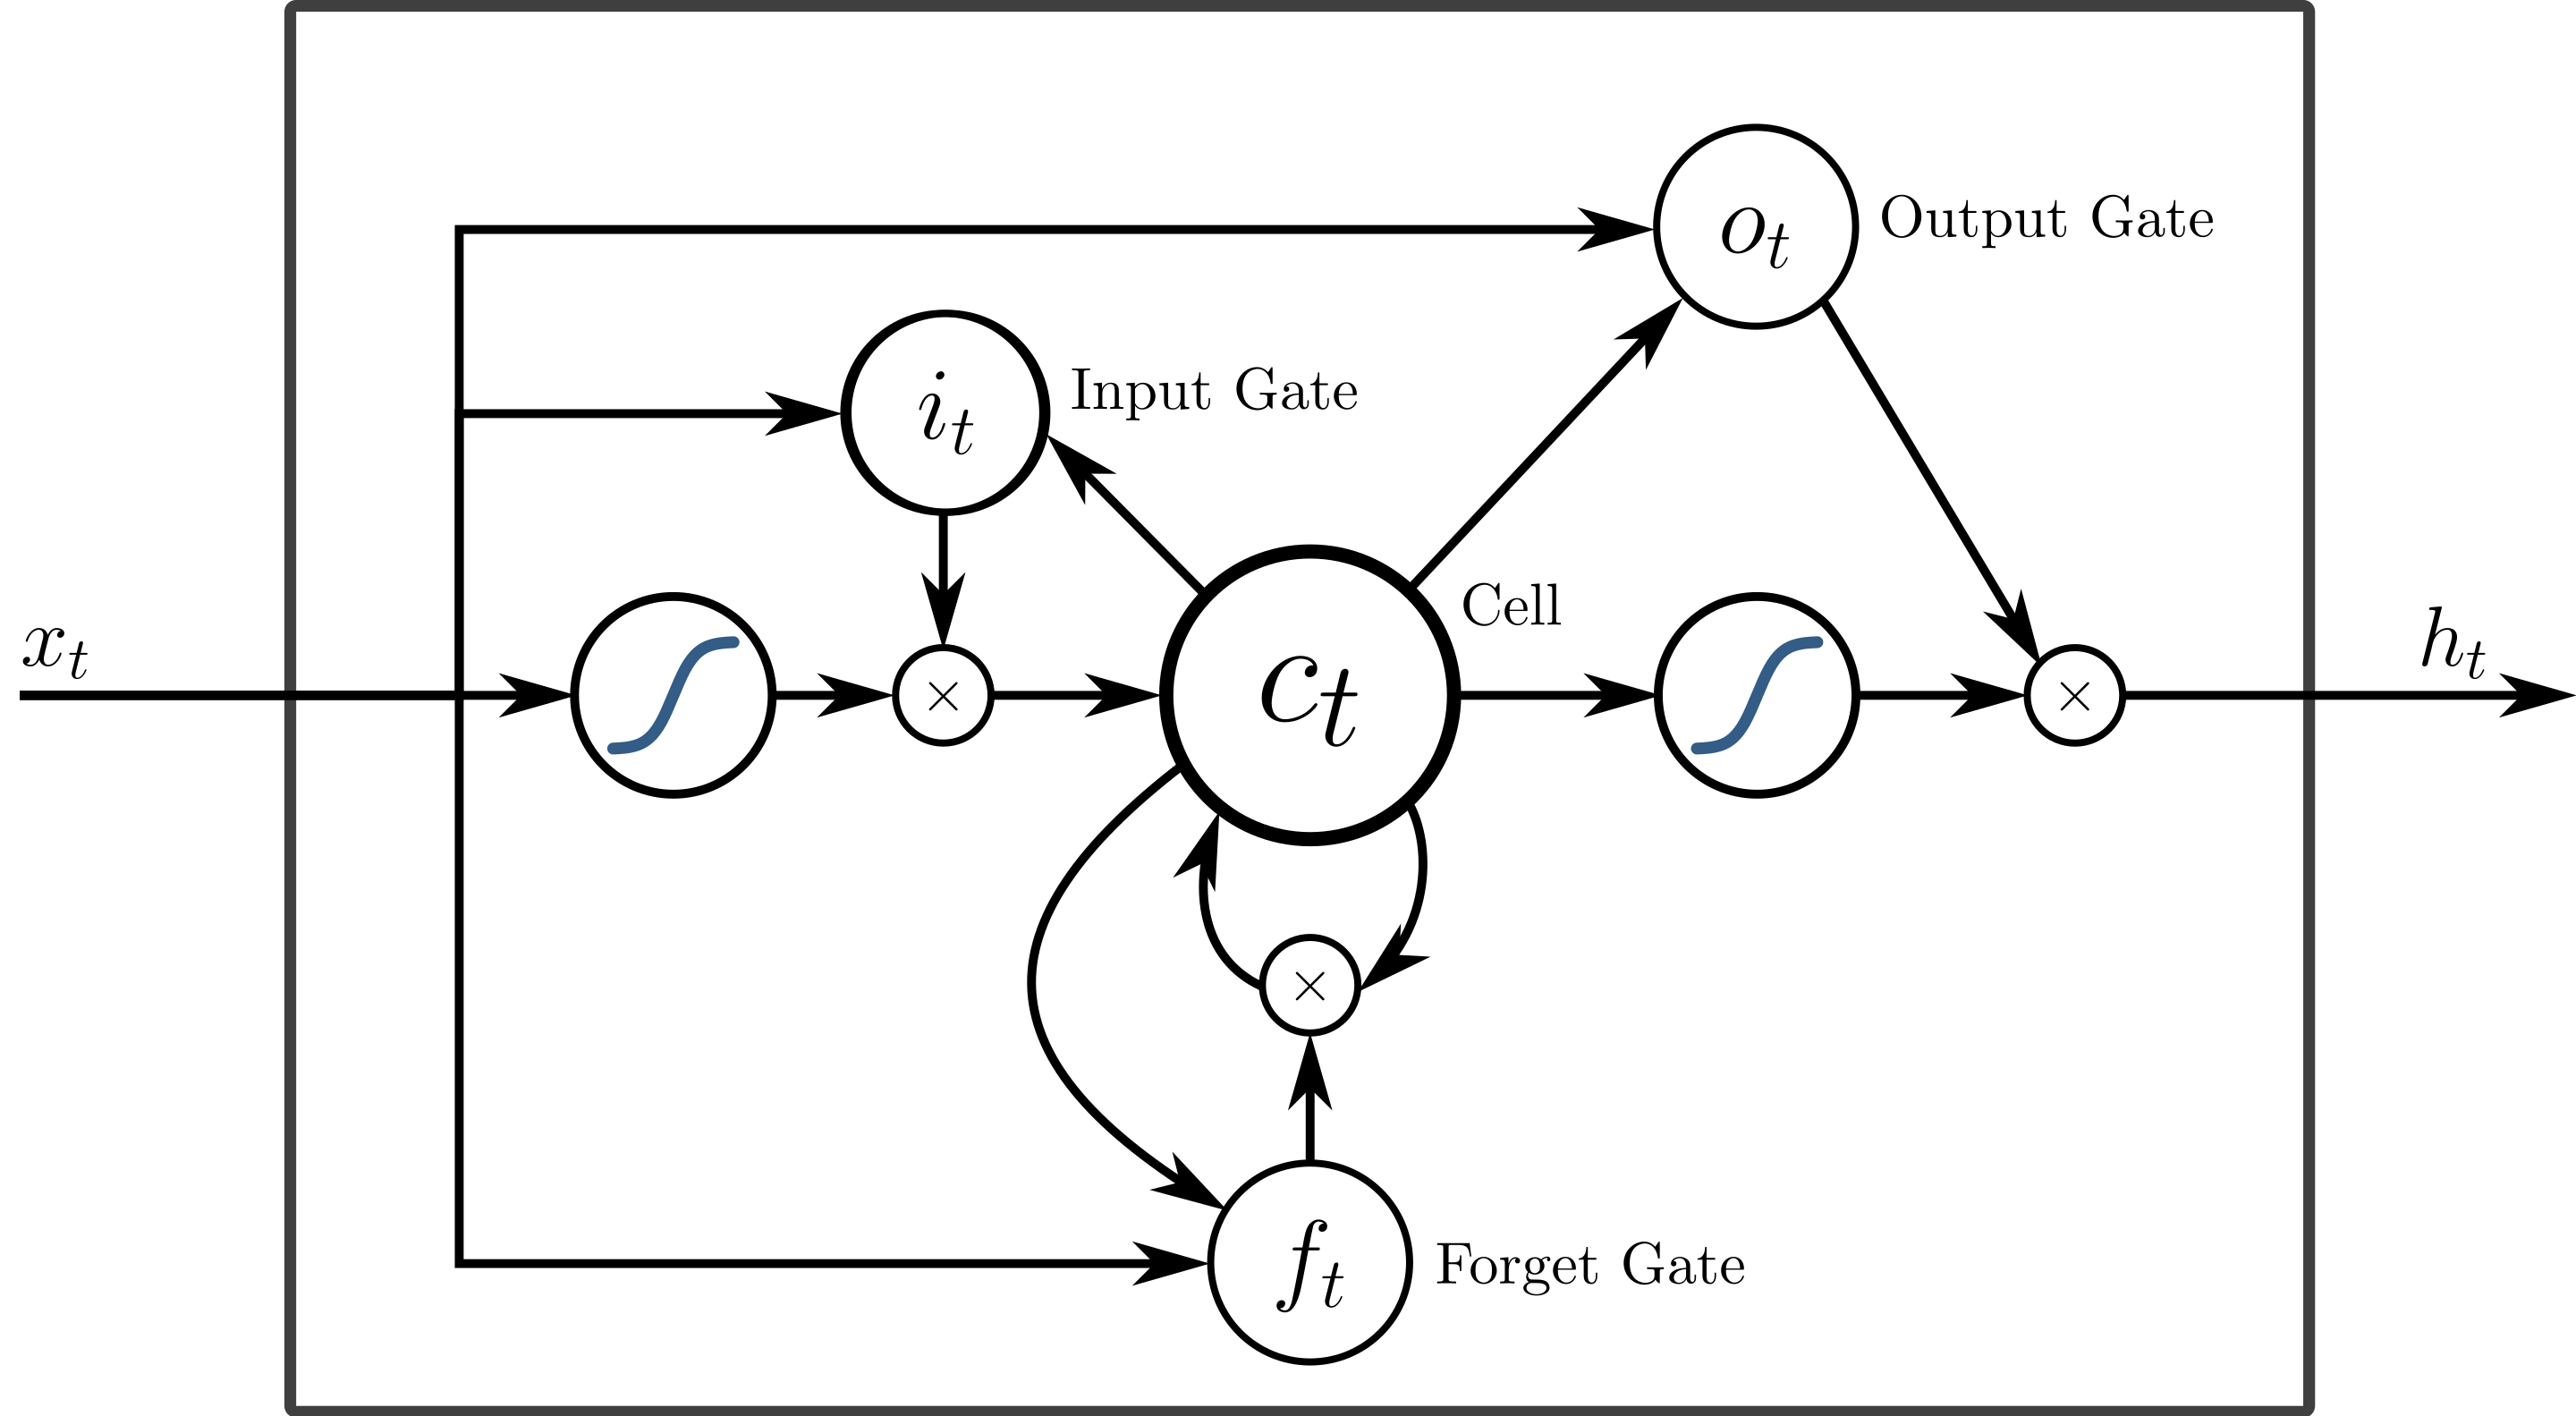

In [180]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import LSTM
from keras.datasets import imdb

# Maximum number of words used 
max_features = 20000
# From each opinion, take the first 80 words 
maxlen = 80
# Group opinions in batches
batch_size = 32
# Car r e gar l e s dades
print('Loading data..')
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features )
print ( len( x_train ) ,'train sequences')
print ( len( x_test ) ,'test sequences ')
# Empaquetar els exemples en mat r ius quadrades ( ompl i r )
print ('Pad sequences ( samples x time )')
x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)
print ('x_train shape:' ,x_train.shape )
print ('x_test shape: ' , x_test.shape )
# Crear e l model amb t r e s cape s
print ('Build model...')
model = Sequential( )
model.add(Embedding(max_features , 128))
model.add(LSTM(128, dropout =0.2, recurrent_dropout =0.2) )
model.add(Dense(1,activation='sigmoid') )
# Compilari ent r ena r
model.compile(loss = 'binary_crossentropy',
optimizer= 'adam',
metrics =[ 'accuracy'])
print ('Train...')
model.fit(x_train,y_train ,
batch_size=batch_size ,
epochs=15,
validation_data =( x_test , y_test ) )
# Avaluar amb les dades de prova
score , acc = model.evaluate (x_test,y_test,batch_size=batch_size )
print ( 'Test score :', score )
print ( 'Test accuracy :' , acc )

Loading data..
25000 train sequences
25000 test sequences 
Pad sequences ( samples x time )
x_train shape: (25000, 80)
x_test shape:  (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 510s 20ms/step - loss: 0.4586 - acc: 0.7823 - val_loss: 0.4685 - val_acc: 0.7796
Epoch 2/15
 7264/25000 [=======>......................] - ETA: 5:07 - loss: 0.3010 - acc: 0.8835

KeyboardInterrupt: 

### REGRESSION USING ML METHODS:

**EXAMPLE: DECISION TREE REGRESSION** 

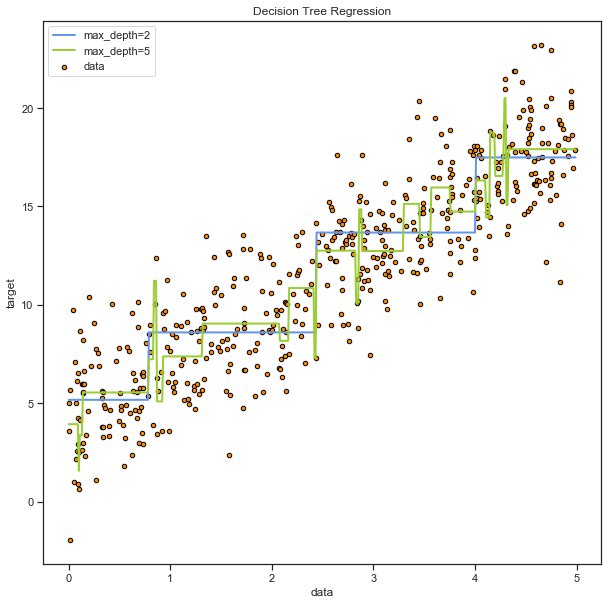

In [127]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
N = 500
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(N, 1), axis=0)
sig2 = 5
y = 3*X.ravel()+4 + np.random.normal(0, np.sqrt(sig2),N)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

REFERENCES_IA.png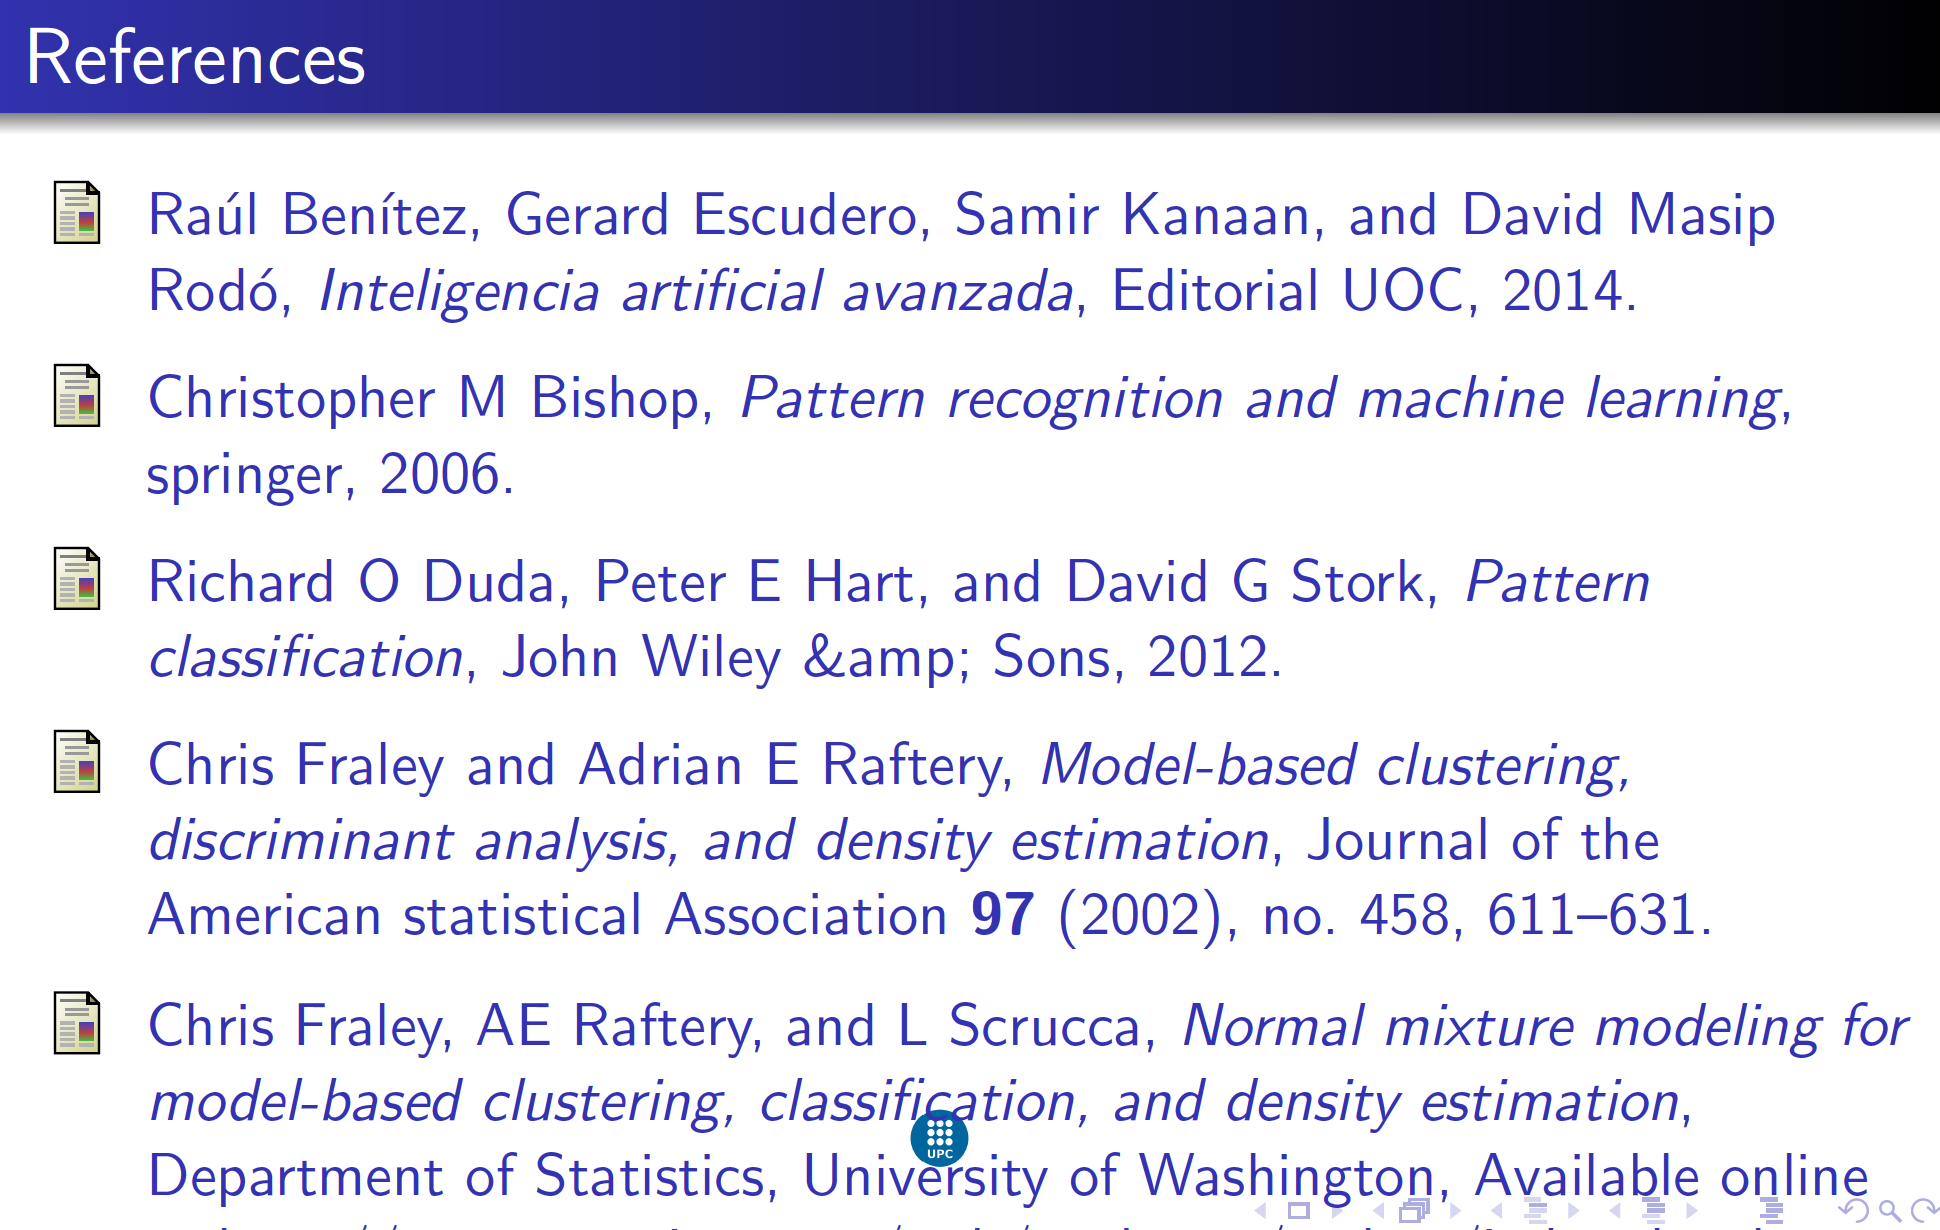